In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import os
import io

In [10]:
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [12]:
test_df = pd.read_csv('https://raw.githubusercontent.com/manuprasad-cybera/Telecom-Churn-Group-Case-Study/refs/heads/main/test.csv')
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [13]:
train_df.shape

(69999, 172)

In [14]:
train_df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

In [15]:
train_df.isnull().sum()

id                     0
circle_id              0
loc_og_t2o_mou       702
std_og_t2o_mou       702
loc_ic_t2o_mou       702
                    ... 
aon                    0
aug_vbc_3g             0
jul_vbc_3g             0
jun_vbc_3g             0
churn_probability      0
Length: 172, dtype: int64

In [16]:
train_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

**Data cleaning and preparation **

In [17]:
#finding the  column with single value

sngl_vl_clm = [col for col in train_df.columns if train_df[col].nunique() == 1]

print(sngl_vl_clm)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [18]:
sngl_vl_clm = [col for col in test_df.columns if test_df[col].nunique() == 1]

print(sngl_vl_clm)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [19]:
# removing the single value column from both test and train data
train_df.drop(sngl_vl_clm, axis=1, inplace=True)

test_df.drop(sngl_vl_clm, axis=1, inplace=True)

In [20]:
# removing  the id column since it is unique for every row
train_df.drop('id', axis=1, inplace=True)

In [25]:
tain_df_cols = [col for col in train_df.columns]

tain_df_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [26]:
date_cols = ['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
            ]

ct_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
           ]

train_cols = [col for col in train_df.columns if col not in date_cols + ct_cols]

In [27]:
# Dropping not use full columns
train_df.drop(columns=date_cols, axis=1, inplace=True)

test_df.drop(columns=date_cols, axis=1, inplace=True)

In [28]:
# Calculate the percentage of missing values for each column
missing_percentage = train_df.isnull().mean() * 100

# Filter columns with more than 70% missing values
high_missing_cols = missing_percentage[missing_percentage > 70].sort_values(ascending=False)

# Display the result
print(high_missing_cols)

total_rech_data_6     74.902499
arpu_3g_6             74.902499
max_rech_data_6       74.902499
fb_user_6             74.902499
count_rech_2g_6       74.902499
night_pck_user_6      74.902499
count_rech_3g_6       74.902499
arpu_2g_6             74.902499
av_rech_amt_data_6    74.902499
fb_user_7             74.478207
night_pck_user_7      74.478207
arpu_2g_7             74.478207
arpu_3g_7             74.478207
av_rech_amt_data_7    74.478207
total_rech_data_7     74.478207
count_rech_3g_7       74.478207
count_rech_2g_7       74.478207
max_rech_data_7       74.478207
av_rech_amt_data_8    73.689624
count_rech_3g_8       73.689624
arpu_3g_8             73.689624
count_rech_2g_8       73.689624
arpu_2g_8             73.689624
max_rech_data_8       73.689624
night_pck_user_8      73.689624
total_rech_data_8     73.689624
fb_user_8             73.689624
dtype: float64


In [29]:
recharge_cols = [col for col in train_df.columns if '_rech_' in col]  # column with reacharge info
print(recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']


In [30]:
# Replacing NaN values in recharge related columns with 0 in the training set
train_df[recharge_cols] = train_df[recharge_cols].fillna(0)
print(train_df[recharge_cols].isnull().sum()*100/train_df.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [31]:
# Replacing NaN values in recharge related columns with 0 in the test set
test_df[recharge_cols] = test_df[recharge_cols].fillna(0)
print(test_df[recharge_cols].isnull().sum()*100/test_df.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [33]:

# Identify columns containing 'arpu'
arpu_columns = [col for col in train_df.columns if 'arpu' in col]

# Print the identified columns
arpu_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [34]:
# Replacing NaN values in ARPU related columns with 0
train_df[arpu_columns] = train_df[arpu_columns].fillna(0)
print(train_df[arpu_columns].isnull().sum()*100/train_df.shape[1])

test_df[arpu_columns] = test_df[arpu_columns].fillna(0)
print(test_df[arpu_columns].isnull().sum()*100/test_df.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64
arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [38]:
# Inspecting categorical columns
categorical_cols = train_df[cat_cols].info
print("Categorical columns:")
print(categorical_cols)



Categorical columns:
<bound method DataFrame.info of        night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                   NaN               NaN               NaN        NaN   
1                   NaN               0.0               NaN        NaN   
2                   NaN               NaN               NaN        NaN   
3                   NaN               NaN               NaN        NaN   
4                   0.0               0.0               0.0        1.0   
...                 ...               ...               ...        ...   
69994               NaN               0.0               0.0        NaN   
69995               NaN               NaN               NaN        NaN   
69996               NaN               NaN               NaN        NaN   
69997               0.0               0.0               0.0        1.0   
69998               0.0               NaN               0.0        1.0   

       fb_user_7  fb_user_8  
0            NaN        NaN 

In [40]:
# Inspecting categorical columns
train_df[col] = train_df[col].astype('category')
train_df[col] = train_df[col].fillna(-1)
print(train[cat_cols].isnull().sum()*100/train.shape[1])

TypeError: Cannot setitem on a Categorical with a new category (-1), set the categories first

In [44]:
train_df[cat_cols] = train_df[cat_cols].fillna(-1).astype('category')
print(train_df[cat_cols].isnull().sum()*100/train_df.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [46]:
train_df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  69999 non-null  category
 1   night_pck_user_7  69999 non-null  category
 2   night_pck_user_8  69999 non-null  category
 3   fb_user_6         69999 non-null  category
 4   fb_user_7         69999 non-null  category
 5   fb_user_8         69999 non-null  category
dtypes: category(6)
memory usage: 411.0 KB


In [47]:
test_df[cat_cols] = test_df[cat_cols].fillna(-1).astype('category')
print(test_df[cat_cols].isnull().sum()*100/test_df.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [48]:
test_df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  30000 non-null  category
 1   night_pck_user_7  30000 non-null  category
 2   night_pck_user_8  30000 non-null  category
 3   fb_user_6         30000 non-null  category
 4   fb_user_7         30000 non-null  category
 5   fb_user_8         30000 non-null  category
dtypes: category(6)
memory usage: 176.7 KB


In [49]:
# prompt: Checking for the columns which have missing values present

# Calculate the percentage of missing values for each column in the training set
missing_percentage_train = train_df.isnull().mean() * 100

# Filter columns with missing values in the training set
cols_with_missing_train = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)

# Print the columns with missing values in the training set
print("Columns with missing values in the training set:")
print(cols_with_missing_train)

# Calculate the percentage of missing values for each column in the test set
missing_percentage_test = test_df.isnull().mean() * 100

# Filter columns with missing values in the test set
cols_with_missing_test = missing_percentage_test[missing_percentage_test > 0].sort_values(ascending=False)

# Print the columns with missing values in the test set
print("\nColumns with missing values in the test set:")
cols_with_missing_test

Columns with missing values in the training set:
ic_others_8         5.290076
loc_og_t2m_mou_8    5.290076
std_og_mou_8        5.290076
spl_og_mou_8        5.290076
std_og_t2f_mou_8    5.290076
                      ...   
std_og_t2f_mou_7    3.838626
og_others_7         3.838626
std_og_mou_7        3.838626
spl_og_mou_7        3.838626
isd_og_mou_7        3.838626
Length: 81, dtype: float64

Columns with missing values in the test set:


ic_others_8         5.583333
loc_og_t2m_mou_8    5.583333
std_og_mou_8        5.583333
spl_og_mou_8        5.583333
std_og_t2f_mou_8    5.583333
                      ...   
loc_ic_t2t_mou_6    3.896667
std_og_mou_6        3.896667
og_others_6         3.896667
isd_og_mou_6        3.896667
onnet_mou_6         3.896667
Length: 81, dtype: float64

In [50]:
high_missing_cols[(high_missing_cols > 0) & (high_missing_cols <= 70)].sort_values(ascending=False)

Series([], dtype: float64)

In [51]:
missing_values_list = high_missing_cols[(high_missing_cols > 0) & (high_missing_cols <= 70)].index
print(missing_values_list)

Index([], dtype='object')


Deriving New Features

In [53]:
train_df['total_rech_data_amt_6'] = train_df['total_rech_data_6'] * train_df['av_rech_amt_data_6']
train_df['total_rech_data_amt_7'] = train_df['total_rech_data_7'] * train_df['av_rech_amt_data_7']

train_df['total_amt_6'] = train_df['total_rech_data_amt_6'] + train_df['total_rech_amt_6']
train_df['total_amt_7'] = train_df['total_rech_data_amt_7'] + train_df['total_rech_amt_7']

train_df['total_avg_amt_6_7'] = train_df[['total_amt_6', 'total_amt_7']].mean(axis=1)

In [54]:
drop_data_cols = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',]

train_df.drop(drop_data_cols, axis=1, inplace=True)

In [55]:
test_df['total_rech_data_amt_6'] = test_df['total_rech_data_6'] * test_df['av_rech_amt_data_6']
test_df['total_rech_data_amt_7'] = test_df['total_rech_data_7'] * test_df['av_rech_amt_data_7']

test_df['total_amt_6'] = test_df['total_rech_data_amt_6'] + test_df['total_rech_amt_6']
test_df['total_amt_7'] = test_df['total_rech_data_amt_7'] + test_df['total_rech_amt_7']

test_df['total_avg_amt_6_7'] = test_df[['total_amt_6', 'total_amt_7']].mean(axis=1)

# Dropping the drop_data_cols from the test set
test_df.drop(drop_data_cols, axis=1, inplace=True)

In [56]:
# Checking for any null value in the derived column in the training set
train_df['total_avg_amt_6_7'].isnull().sum()

0

In [57]:
train_df.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   31.277   87.009    7.527        48.58       124.38         1.29   
1    0.000  122.787   42.953         0.00         0.00         0.00   
2   60.806  103.176    0.000         0.53        15.93         0.00   
3  156.362  205.260  111.095         7.26        16.01         0.00   
4  240.708  128.191  101.565        21.28         4.83         6.13   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_7  \
0         32.24         96.68          2.33           0.00  ...       -1.0   
1          0.00         25.99         30.89           0.00  ...        1.0   
2         53.99         82.05          0.00           0.00  ...       -1.0   
3         68.76         78.48         50.23           0.00  ...       -1.0   
4         56.99         38.11          9.63          53.64  ...        1.0   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
0       -1.0  1958         0.0         0.0         0.0                  0   
1       -1.0   710         0.0         0.0         0.0                  0   
2       -1.0   882         0.0         0.0         0.0                  0   
3       -1.0   982         0.0         0.0         0.0                  0   
4        1.0   647         0.0         0.0         0.0                  0   

   total_amt_6  total_amt_7  total_avg_amt_6_7  
0         77.0         65.0               71.0  
1          0.0        290.0              145.0  
2         70.0        120.0               95.0  
3        160.0        240.0              200.0  
4       1515.0       1473.0             1494.0  

[5 rows x 149 columns]

In [58]:
train_df.shape

(69999, 149)

In [59]:
test_df['total_avg_amt_6_7'].isnull().sum()

0

In [60]:
test_df.shape

(30000, 149)

In [61]:
test_df.head()

id   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  69999   91.882   65.330   64.445        31.78        20.23        23.11   
1  70000  414.168  515.568  360.868        75.51        41.21        19.84   
2  70001  329.844  434.884  746.239         7.54         7.86         8.40   
3  70002   43.550  171.390   24.400         5.31         2.16         0.00   
4  70003  306.854  406.289  413.329       450.93       609.03       700.68   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  fb_user_6  fb_user_7  \
0         60.16         32.16         34.83  ...       -1.0       -1.0   
1        474.34        621.84        394.94  ...       -1.0       -1.0   
2         16.98         45.81         45.04  ...       -1.0       -1.0   
3         40.04        205.01         24.01  ...       -1.0       -1.0   
4         60.94         23.84         74.16  ...       -1.0       -1.0   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_amt_6  \
0       -1.0  1692        0.00        0.00        0.00        103.0   
1       -1.0  2533        0.00        0.00        0.00        500.0   
2       -1.0   277      525.61      758.41      241.84        500.0   
3       -1.0  1244        0.00        0.00        0.00        110.0   
4       -1.0   462        0.00        0.00        0.00        356.0   

   total_amt_7  total_avg_amt_6_7  
0         90.0               96.5  
1        500.0              500.0  
2       1000.0              750.0  
3        260.0              185.0  
4        490.0              423.0  

[5 rows x 149 columns]

In [62]:
# Calculate the 70th percentile of 'total_avg_amt_6_7'
cutoff_value = train_df['total_avg_amt_6_7'].quantile(0.70)

print(f"Cutoff value for the top 70% of high-value customers: {cutoff_value}")

Cutoff value for the top 70% of high-value customers: 477.5


In [65]:
# Create a new DataFrame containing only high-value customers
high_val_train = train_df[train_df['total_avg_amt_6_7'] > 477.5]

# Display the first few rows of the new DataFrame
print(high_val_train.shape)

(20998, 149)


Analysing our target variable churn_probability

In [66]:
high_val_train['churn_probability'].dtype

dtype('int64')

In [69]:
#change to category dtype as it is a classification variable.
high_val_train['churn_probability'] = high_val_train['churn_probability'].astype('category')

<ipython-input-69-142fc9caeeea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_val_train['churn_probability'] = high_val_train['churn_probability'].astype('category')


In [70]:
high_val_train['churn_probability'].dtype

CategoricalDtype(categories=[0, 1], ordered=False, categories_dtype=int64)

In [73]:

# Calculate value counts for 'churn_probability'
churn_counts = high_val_train['churn_probability'].value_counts()
print("Churn Value Counts:\n", churn_counts)

# Calculate churn ratio
churn_ratio = churn_counts[1] / (churn_counts[0] + churn_counts[1])
print(f"\nChurn Ratio: {churn_ratio:.4f}")

Churn Value Counts:
 churn_probability
0    19263
1     1735
Name: count, dtype: int64

Churn Ratio: 0.0826


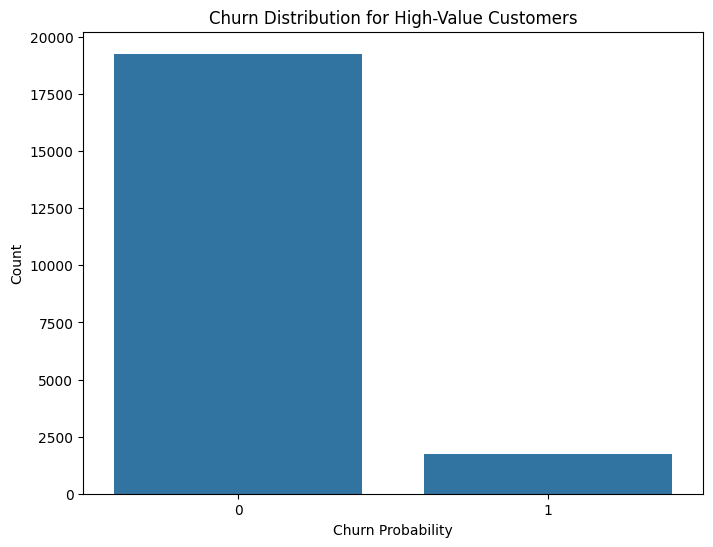

In [74]:

plt.figure(figsize=(8, 6))
sns.countplot(x='churn_probability', data=high_val_train)
plt.title('Churn Distribution for High-Value Customers')
plt.xlabel('Churn Probability')
plt.ylabel('Count')
plt.show()

It is clear from the visualization that 8.26% of customers churn, whilst 91.73% of consumers do not. This suggests a clear disparity in class, which we will discuss later.

In [75]:
churn_data = high_val_train.copy()

In [76]:
churn_data.shape

(20998, 149)

In [79]:
# Determine the proportion of missing values in each training set column.
missing_counts = churn_data.isnull().sum()
impute_cols_num = missing_counts[missing_counts > 0].index.tolist()
len(impute_cols_num)

81

In [81]:
# Calculate the percentage of missing values for each column in the training set
drop = high_val_train.dropna()
print(churn_data.shape[0] - drop.shape[0])

1061


In [83]:
# Import KNNImputer
from sklearn.impute import KNNImputer

# Create imputer instance
imputer = KNNImputer(n_neighbors=5)

In [85]:
# Separate df having columns to be imputed
df_num = churn_data[impute_cols_num]
df_num

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
4            21.28         4.83         6.13         56.99         38.11   
15           10.43        24.99       194.43        317.11        341.79   
23          859.53       372.71         0.89        293.46        450.11   
24           93.18        38.29        29.86        531.19        507.76   
27            8.58        11.48        12.68        133.16        158.73   
...            ...          ...          ...           ...           ...   
69984        84.91       133.44       178.08        823.86        645.89   
69989         1.05         0.00         5.83         44.74         32.16   
69993        45.08        94.31         8.34        111.51        236.61   
69994         0.00         7.36        10.93          0.00        488.46   
69997        14.01         7.64         6.71         30.34         16.68   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
4              9.63          53.64            0.0           0.00   
15           197.09           0.00            0.0           0.00   
23           386.91           0.00            0.0           0.00   
24           222.03           0.00            0.0           0.00   
27           182.83           0.00            0.0           0.00   
...             ...            ...            ...            ...   
69984        703.19           0.00            0.0           0.00   
69989         30.93           0.00            0.0           0.00   
69993         91.54           0.00            0.0         506.26   
69994        381.64          14.96            0.0           0.00   
69997         12.56          25.06            0.0           0.00   

       roam_og_mou_6  ...  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  \
4              15.73  ...          0.00          0.00          0.00   
15              0.00  ...          0.00          0.00          0.00   
23              0.00  ...          0.00          0.13          0.00   
24              0.00  ...         21.93          0.00          0.00   
27              0.00  ...          0.40          0.00          0.00   
...              ...  ...           ...           ...           ...   
69984           0.00  ...          9.94          0.00          0.00   
69989           0.00  ...          0.00          0.08          0.11   
69993           0.00  ...          5.16          0.00          0.00   
69994           0.00  ...         11.79          0.00          0.00   
69997           4.58  ...          9.94          0.00          0.00   

       spl_ic_mou_8  isd_ic_mou_6  isd_ic_mou_7  isd_ic_mou_8  ic_others_6  \
4               0.0          0.00          0.00          0.00          0.0   
15              0.0          0.00          0.00          0.00          0.0   
23              0.0          0.00          0.00          0.00          0.0   
24              0.0          0.00          0.00          0.00          0.0   
27              0.0          0.00          0.00          0.00          0.0   
...             ...           ...           ...           ...          ...   
69984           0.0         10.88          1.23          3.03          0.0   
69989           0.0          0.00          0.00          0.00          0.0   
69993           0.0          0.00         10.96          0.00          0.0   
69994           0.0          0.00          0.00          0.00          0.0   
69997           0.0          0.00          0.00          0.00          0.0   

       ic_others_7  ic_others_8  
4             0.00          0.0  
15            0.00          0.0  
23            0.15          0.4  
24            0.00          0.0  
27            0.00          0.0  
...            ...          ...  
69984         0.00          0.0  
69989         0.00          0.0  
69993         0.00          0.0  
69994         0.00          0.0  
69997         0.00          0.0  

[20998 rows x 81 columns]

In [86]:
churn_df = churn_data.drop(impute_cols_num, axis=1)

In [88]:
%%time
# Impute using KNN imputer instance
df_imp = imputer.fit_transform(df_num)

CPU times: user 17.9 s, sys: 5.46 s, total: 23.3 s
Wall time: 22.8 s


In [89]:
df_imp = pd.DataFrame(df_imp, columns=impute_cols_num)
df_imp.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        21.28         4.83         6.13         56.99         38.11   
1        10.43        24.99       194.43        317.11        341.79   
2       859.53       372.71         0.89        293.46        450.11   
3        93.18        38.29        29.86        531.19        507.76   
4         8.58        11.48        12.68        133.16        158.73   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0          9.63          53.64            0.0            0.0          15.73   
1        197.09           0.00            0.0            0.0           0.00   
2        386.91           0.00            0.0            0.0           0.00   
3        222.03           0.00            0.0            0.0           0.00   
4        182.83           0.00            0.0            0.0           0.00   

   ...  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0  ...          0.00          0.00           0.0           0.0           0.0   
1  ...          0.00          0.00           0.0           0.0           0.0   
2  ...          0.00          0.13           0.0           0.0           0.0   
3  ...         21.93          0.00           0.0           0.0           0.0   
4  ...          0.40          0.00           0.0           0.0           0.0   

   isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  
0           0.0           0.0          0.0         0.00          0.0  
1           0.0           0.0          0.0         0.00          0.0  
2           0.0           0.0          0.0         0.15          0.4  
3           0.0           0.0          0.0         0.00          0.0  
4           0.0           0.0          0.0         0.00          0.0  

[5 rows x 81 columns]

In [90]:
final_df = pd.concat([df_imp, churn_df], join='inner', axis=1)
final_df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
4          8.58        11.48        12.68        133.16        158.73   
15       552.53       290.29       805.76        155.31         69.86   
23       104.79        45.68        73.71        464.29        770.94   
24        14.58        10.29         7.71        821.36       1395.06   
27        97.69        66.86        29.24       1901.56        259.61   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
4         182.83           0.00           0.00            0.0           0.00   
15        290.14          39.06         133.31            0.0         156.69   
23        911.63           0.00           0.00            0.0           0.00   
24       1740.76           5.04           0.00            0.0           0.00   
27        206.01           0.00           0.00            0.0           0.00   

    ...  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
4   ...        1.0        1.0   647         0.0        0.00        0.00   
15  ...       -1.0        1.0   602         0.0        0.00        0.00   
23  ...       -1.0       -1.0   455         0.0        0.00        0.00   
24  ...        0.0        0.0  1219         0.0        0.00        0.00   
27  ...        1.0        1.0   573       700.4      185.71      173.72   

    churn_probability  total_amt_6  total_amt_7  total_avg_amt_6_7  
4                   0       1515.0       1473.0             1494.0  
15                  0        808.0        400.0              604.0  
23                  0       1420.0        990.0             1205.0  
24                  0        463.0        519.0              491.0  
27                  0       1385.0       1180.0             1282.5  

[5 rows x 149 columns]

In [91]:
final_df.shape

(6259, 149)

In [92]:
final_df.isnull().sum().sort_values(ascending=False)

onnet_mou_6          0
total_rech_amt_7     0
max_rech_amt_6       0
max_rech_amt_7       0
max_rech_amt_8       0
                    ..
loc_ic_t2t_mou_8     0
loc_ic_t2m_mou_6     0
loc_ic_t2m_mou_7     0
loc_ic_t2m_mou_8     0
total_avg_amt_6_7    0
Length: 149, dtype: int64

Impute missing values using the KNN Imputer - Unseen Test Set

In [95]:
df_num_test = test_df[impute_cols_num]
churn_df_test = test_df.drop(impute_cols_num, axis=1)

In [96]:
%%time
# Impute using KNN imputer instance
df_imp_test = imputer.transform(df_num_test)

CPU times: user 44.8 s, sys: 15.3 s, total: 1min
Wall time: 1min 1s


In [97]:
df_imp_test = pd.DataFrame(df_num_test, columns=impute_cols_num)
df_imp_test.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        31.78        20.23        23.11         60.16         32.16   
1        75.51        41.21        19.84        474.34        621.84   
2         7.54         7.86         8.40         16.98         45.81   
3         5.31         2.16         0.00         40.04        205.01   
4       450.93       609.03       700.68         60.94         23.84   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         34.83           0.00           0.00           0.00           0.00   
1        394.94           0.00           0.00           0.00           0.00   
2         45.04          22.81         103.38          26.08          24.53   
3         24.01           0.00           0.00           0.00           0.00   
4         74.16           0.00           0.00           0.00           0.00   

   ...  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  isd_ic_mou_6  \
0  ...          4.34          0.54          0.34          0.39          0.00   
1  ...          0.00          0.00          0.00          0.00        114.63   
2  ...          0.00          0.00          0.00          0.00          0.00   
3  ...          8.83          0.00          0.00          0.00          0.00   
4  ...        141.48          0.00          0.00          0.00          0.00   

   isd_ic_mou_7  isd_ic_mou_8  ic_others_6  ic_others_7  ic_others_8  
0          0.00          0.00          0.0          0.0         0.00  
1        177.88         94.23          0.0          0.0         0.00  
2          0.00          0.00          0.0          0.0         0.00  
3          1.43          8.65          0.0          0.0         0.00  
4          0.00          0.00          0.0          0.0         0.16  

[5 rows x 81 columns]

In [98]:
final_test_df = pd.concat([df_imp_test, churn_df_test], join='inner', axis=1)
final_test_df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        31.78        20.23        23.11         60.16         32.16   
1        75.51        41.21        19.84        474.34        621.84   
2         7.54         7.86         8.40         16.98         45.81   
3         5.31         2.16         0.00         40.04        205.01   
4       450.93       609.03       700.68         60.94         23.84   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0         34.83           0.00           0.00           0.00           0.00   
1        394.94           0.00           0.00           0.00           0.00   
2         45.04          22.81         103.38          26.08          24.53   
3         24.01           0.00           0.00           0.00           0.00   
4         74.16           0.00           0.00           0.00           0.00   

   ...  fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  \
0  ...       -1.0       -1.0       -1.0  1692        0.00        0.00   
1  ...       -1.0       -1.0       -1.0  2533        0.00        0.00   
2  ...       -1.0       -1.0       -1.0   277      525.61      758.41   
3  ...       -1.0       -1.0       -1.0  1244        0.00        0.00   
4  ...       -1.0       -1.0       -1.0   462        0.00        0.00   

   jun_vbc_3g  total_amt_6  total_amt_7  total_avg_amt_6_7  
0        0.00        103.0         90.0               96.5  
1        0.00        500.0        500.0              500.0  
2      241.84        500.0       1000.0              750.0  
3        0.00        110.0        260.0              185.0  
4        0.00        356.0        490.0              423.0  

[5 rows x 149 columns]

In [100]:
final_test_df.shape

(30000, 149)

In [101]:
final_test_df.isnull().sum().sort_values(ascending=False)

spl_ic_mou_8         1675
isd_og_mou_8         1675
loc_og_mou_8         1675
std_og_t2t_mou_8     1675
std_og_t2m_mou_8     1675
                     ... 
count_rech_3g_6         0
count_rech_3g_7         0
count_rech_3g_8         0
vol_2g_mb_6             0
total_avg_amt_6_7       0
Length: 149, dtype: int64

In [116]:
def plot_bar_graph_plotly(title, month, y_list, data):
    plt.figure(figsize=(15, 10))
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)

    plt.tight_layout()
    plt.show()

In [105]:
def outlier_handling(dataframe):
    transformed_values = []
    for value in dataframe:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values

In [104]:
def calculate_classification_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)
    sensitivity = round(TP / (TP + FN), 4)

    specificity = round(TN / (TN + FP), 4)

    precision = round(TP / (TP + FP), 4)
    false_positive_rate = round(FP / (FP + TN), 4)
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [ ]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

Exploratory Data Analysis

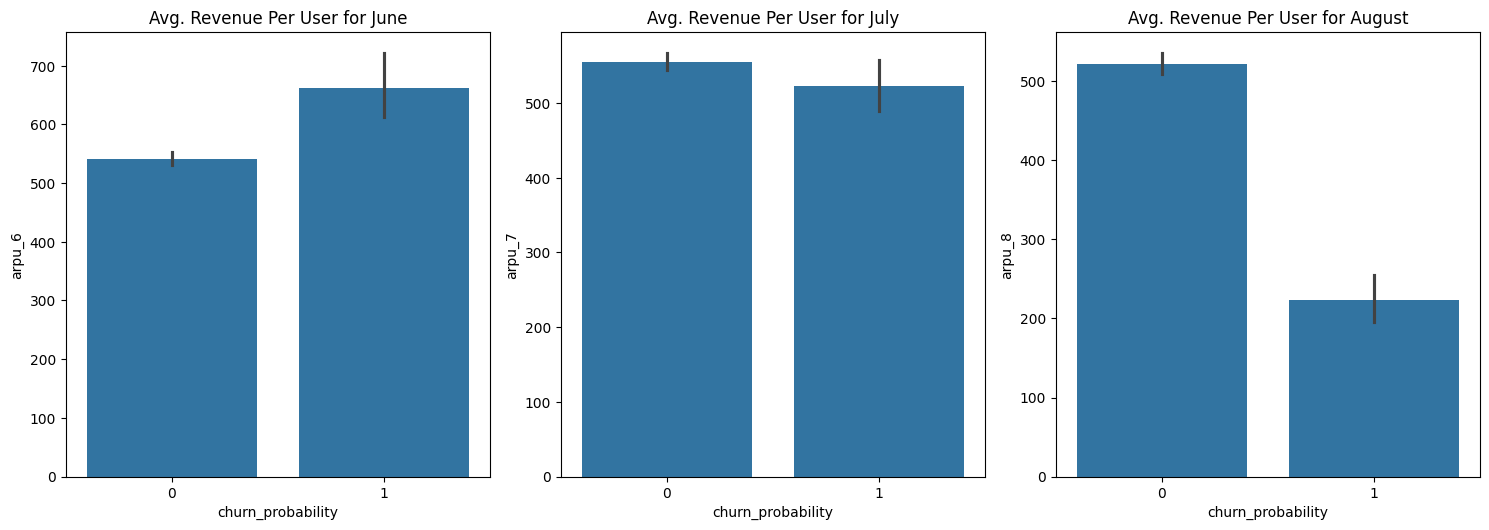

In [117]:
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
plot_bar_graph_plotly('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols, final_df)

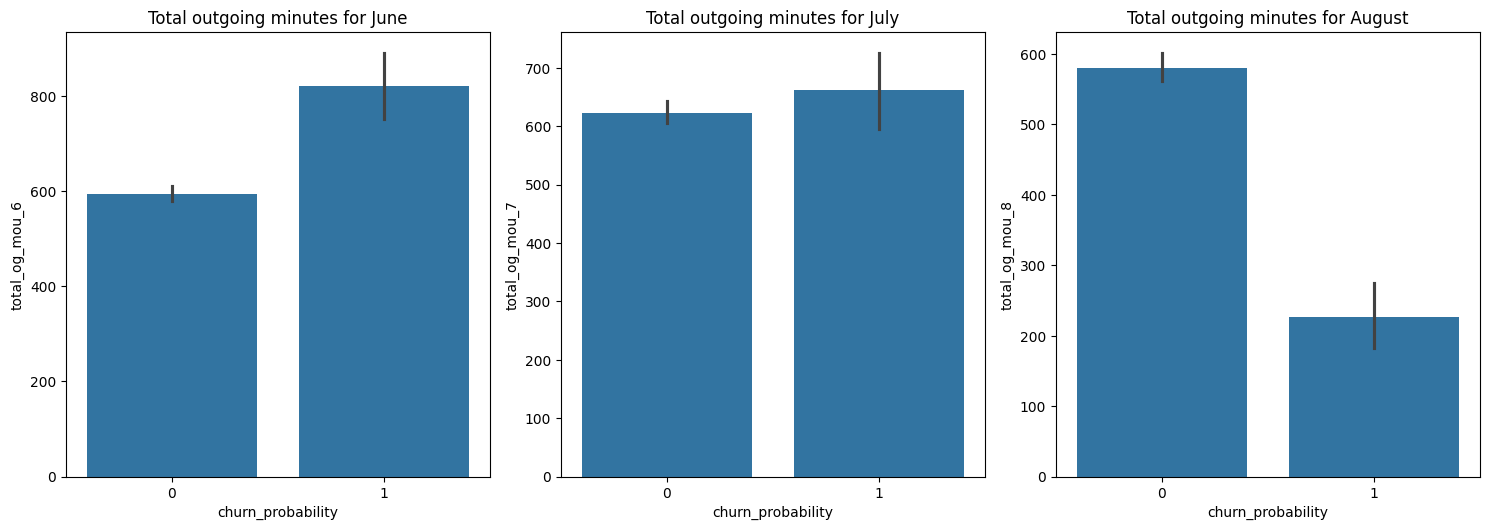

In [118]:
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph_plotly('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, final_df)

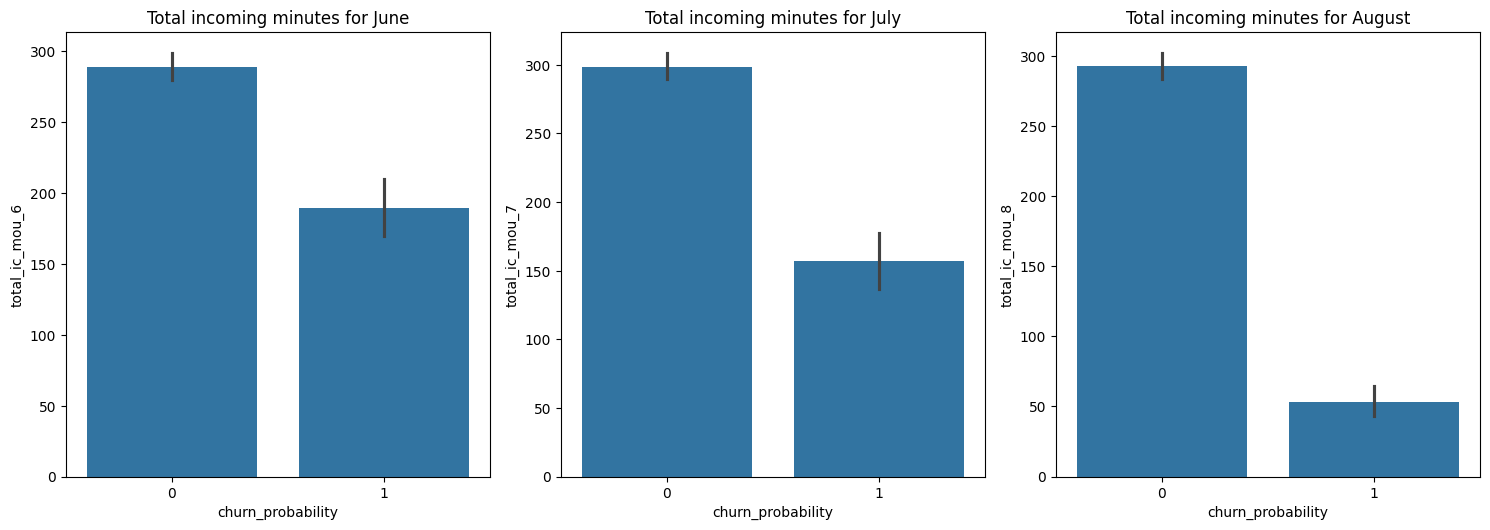

In [119]:
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_bar_graph_plotly('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, final_df)

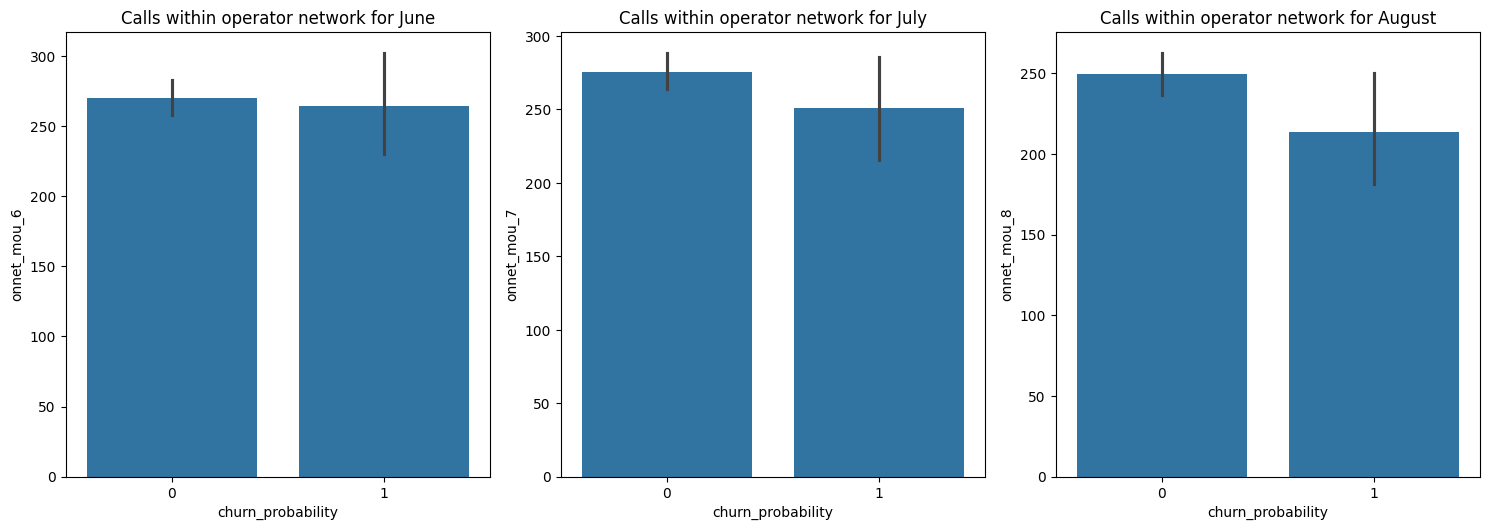

In [120]:
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph_plotly('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, final_df)

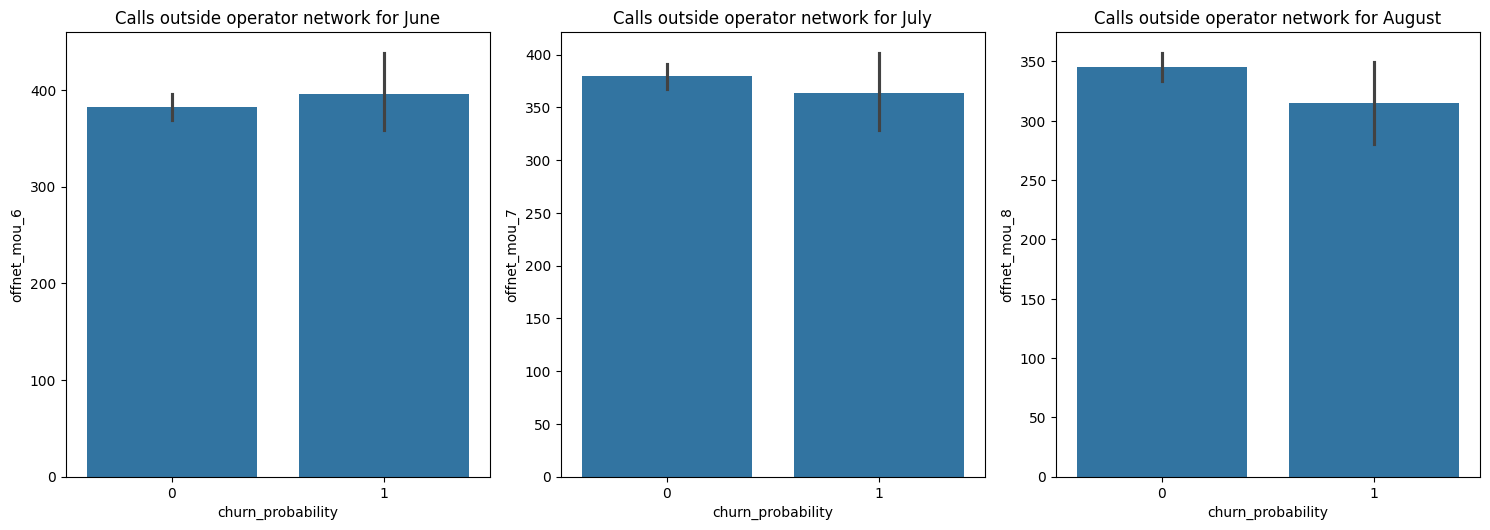

In [121]:
offnet_mou_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plot_bar_graph_plotly('Calls outside operator network', ['June', 'July', 'August'], offnet_mou_cols, final_df)

Churn is suggested by the drop in calls made outside of the operator network in August.

In [124]:

amount_data = final_df.loc[:, final_df.columns.str.contains('amt')]
data2g = final_df.loc[:, final_df.columns.str.contains('2g')]
data3g = final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data = final_df.loc[:, final_df.columns.str.contains('ic') & final_df.columns.str.contains('mou')]
net_mou_data = final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data = final_df.loc[:, final_df.columns.str.contains('og') & final_df.columns.str.contains('mou')]
rech_data = final_df.loc[:, final_df.columns.str.contains('rech')]
total_data = final_df.loc[:, final_df.columns.str.contains('tot')]

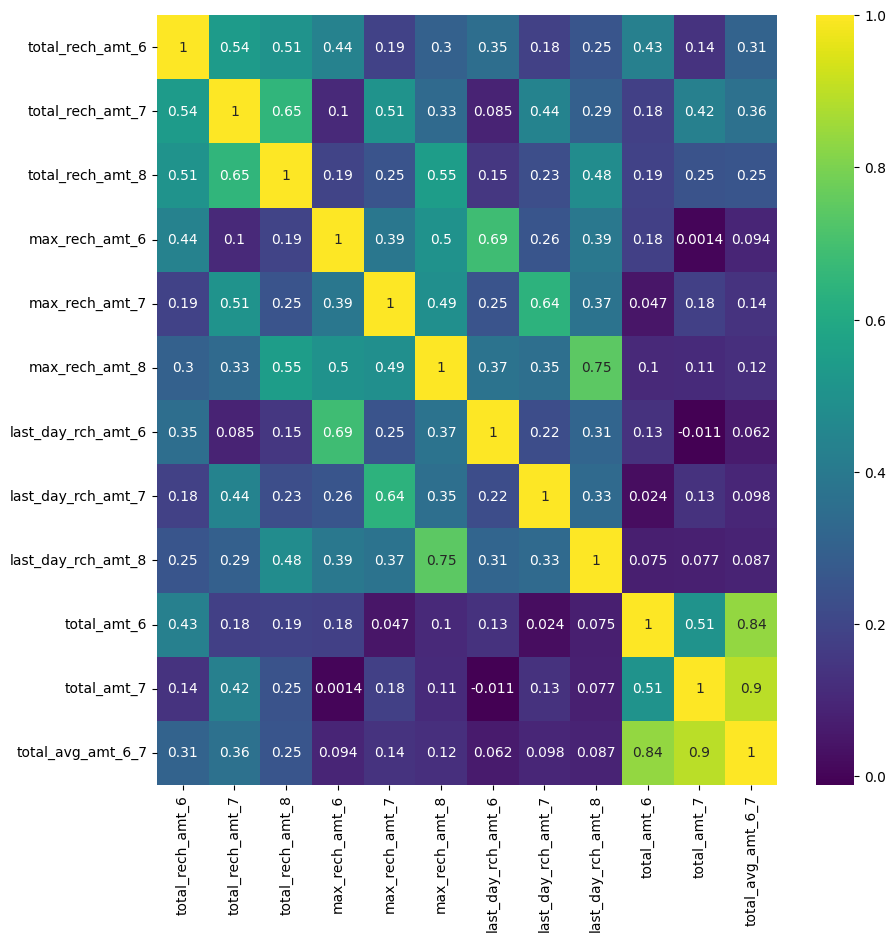

In [125]:
# Amount data
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(), annot=True, cmap='viridis')
plt.show()


## obervation
*   There is a significant 74% link between the total recharge amount in month 7 and month 8.
    
*   Likewise, there is a significant 68% association between the last day's recharge amount in the same month and the maximum recharge amount in month 8.

*     This implies that in month eight, consumers who are unlikely to churn tend to recharge more.






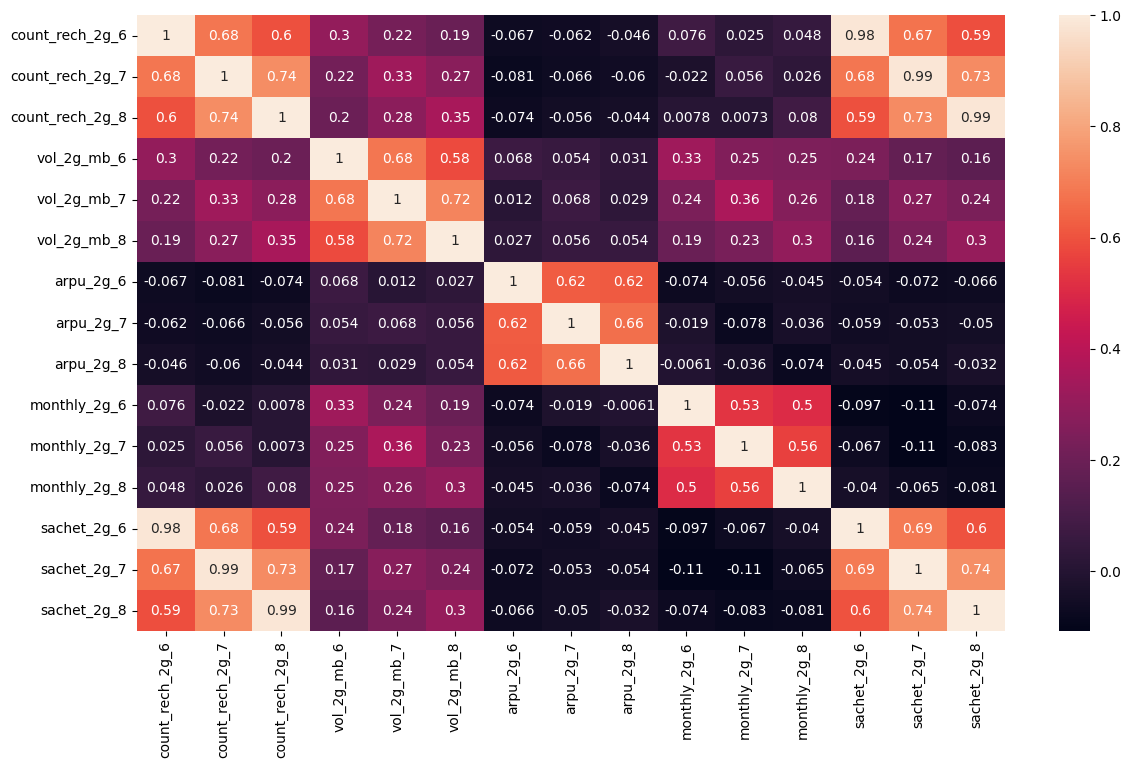

In [127]:
plt.figure(figsize=(14,8))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

obervation:  The recharge amounts in months 7 and 8 are highly correlated.

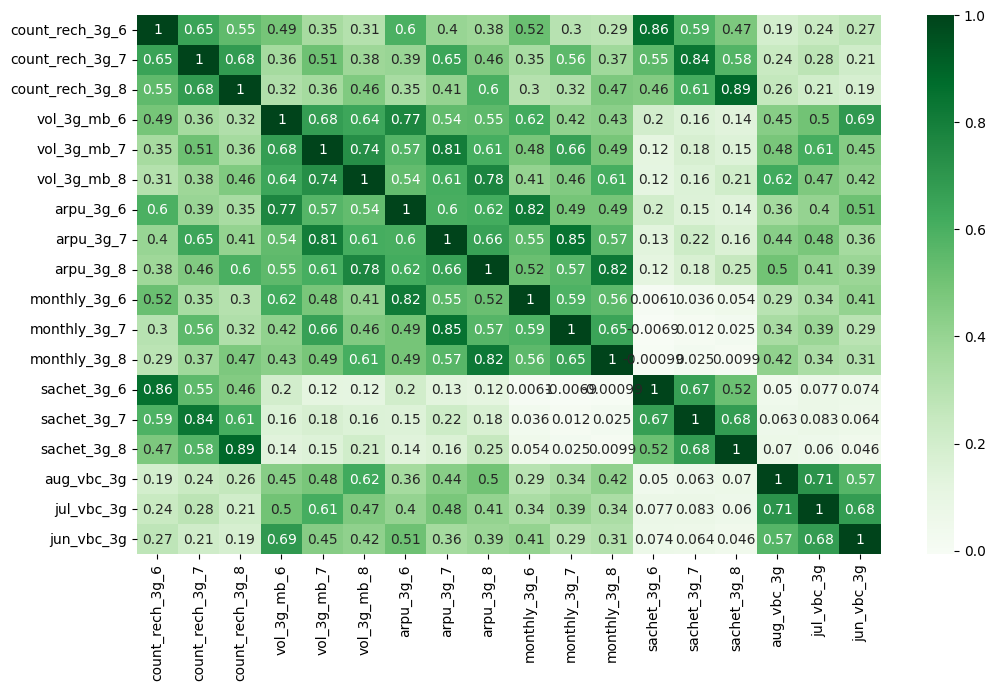

In [129]:
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

obervation:  The recharge amounts in months 7 and 8 are highly correlated.

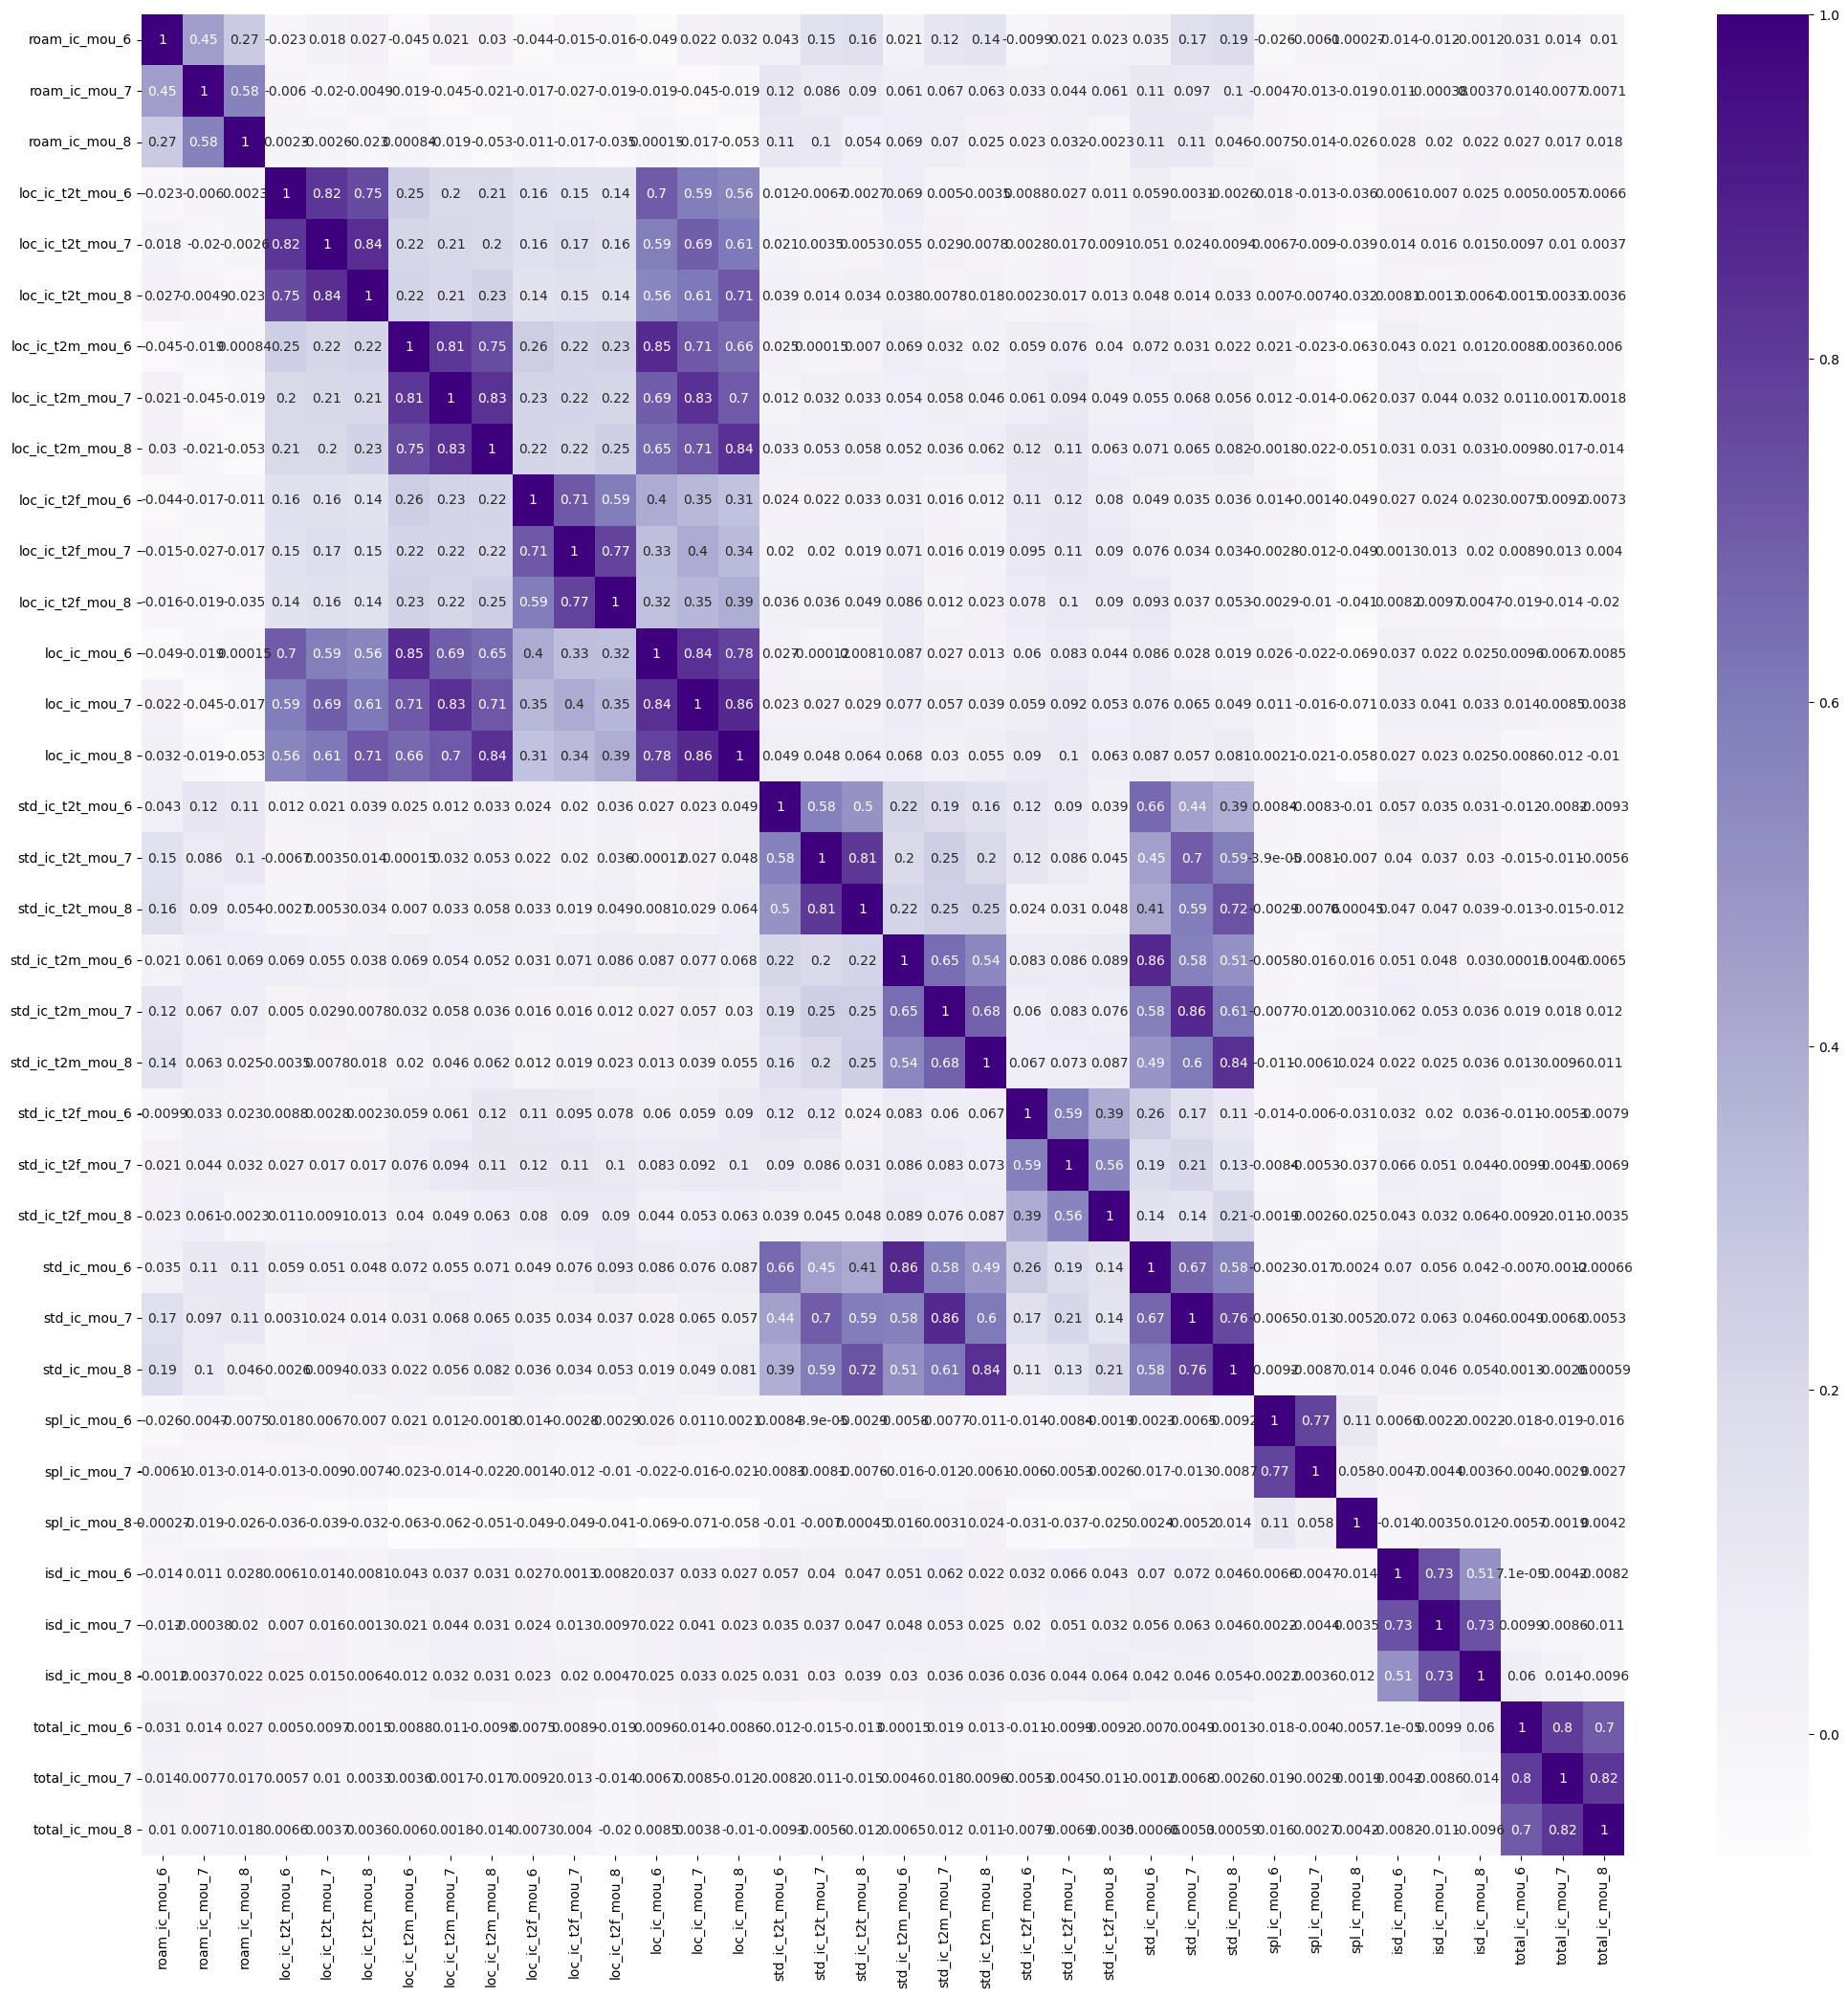

In [130]:
plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_data.corr(), annot=True, cmap='Purples')
plt.show()

**obervation** :

The correlation between the following variables or traits is exceptionally high:

1.   total_ic_mou_6 and loc_ic_mou_6
2.   total_ic_mou_7 and loc_ic_mou_7
3.   total_ic_mou_8 and loc_ic_mou_8
4.   std_ic_mou_6 and std_ic_t2f_mou_6
5.   std_ic_mou_7 and std_ic_t2f_mou_7
6.   std_ic_mou_8 and std_ic_t2f_mou_8


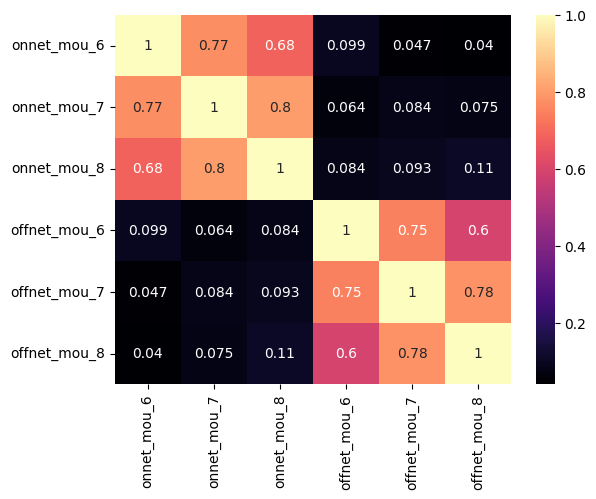

In [132]:
#net_mou_data
sns.heatmap(net_mou_data.corr(), annot=True, cmap='magma')
plt.show()



Observations:

*   There is no correlation between the usage minutes for on-net and off-net calls.
*   However, a significant correlation is observed between the on-net and off-net usage minutes in both months 7 and 8.



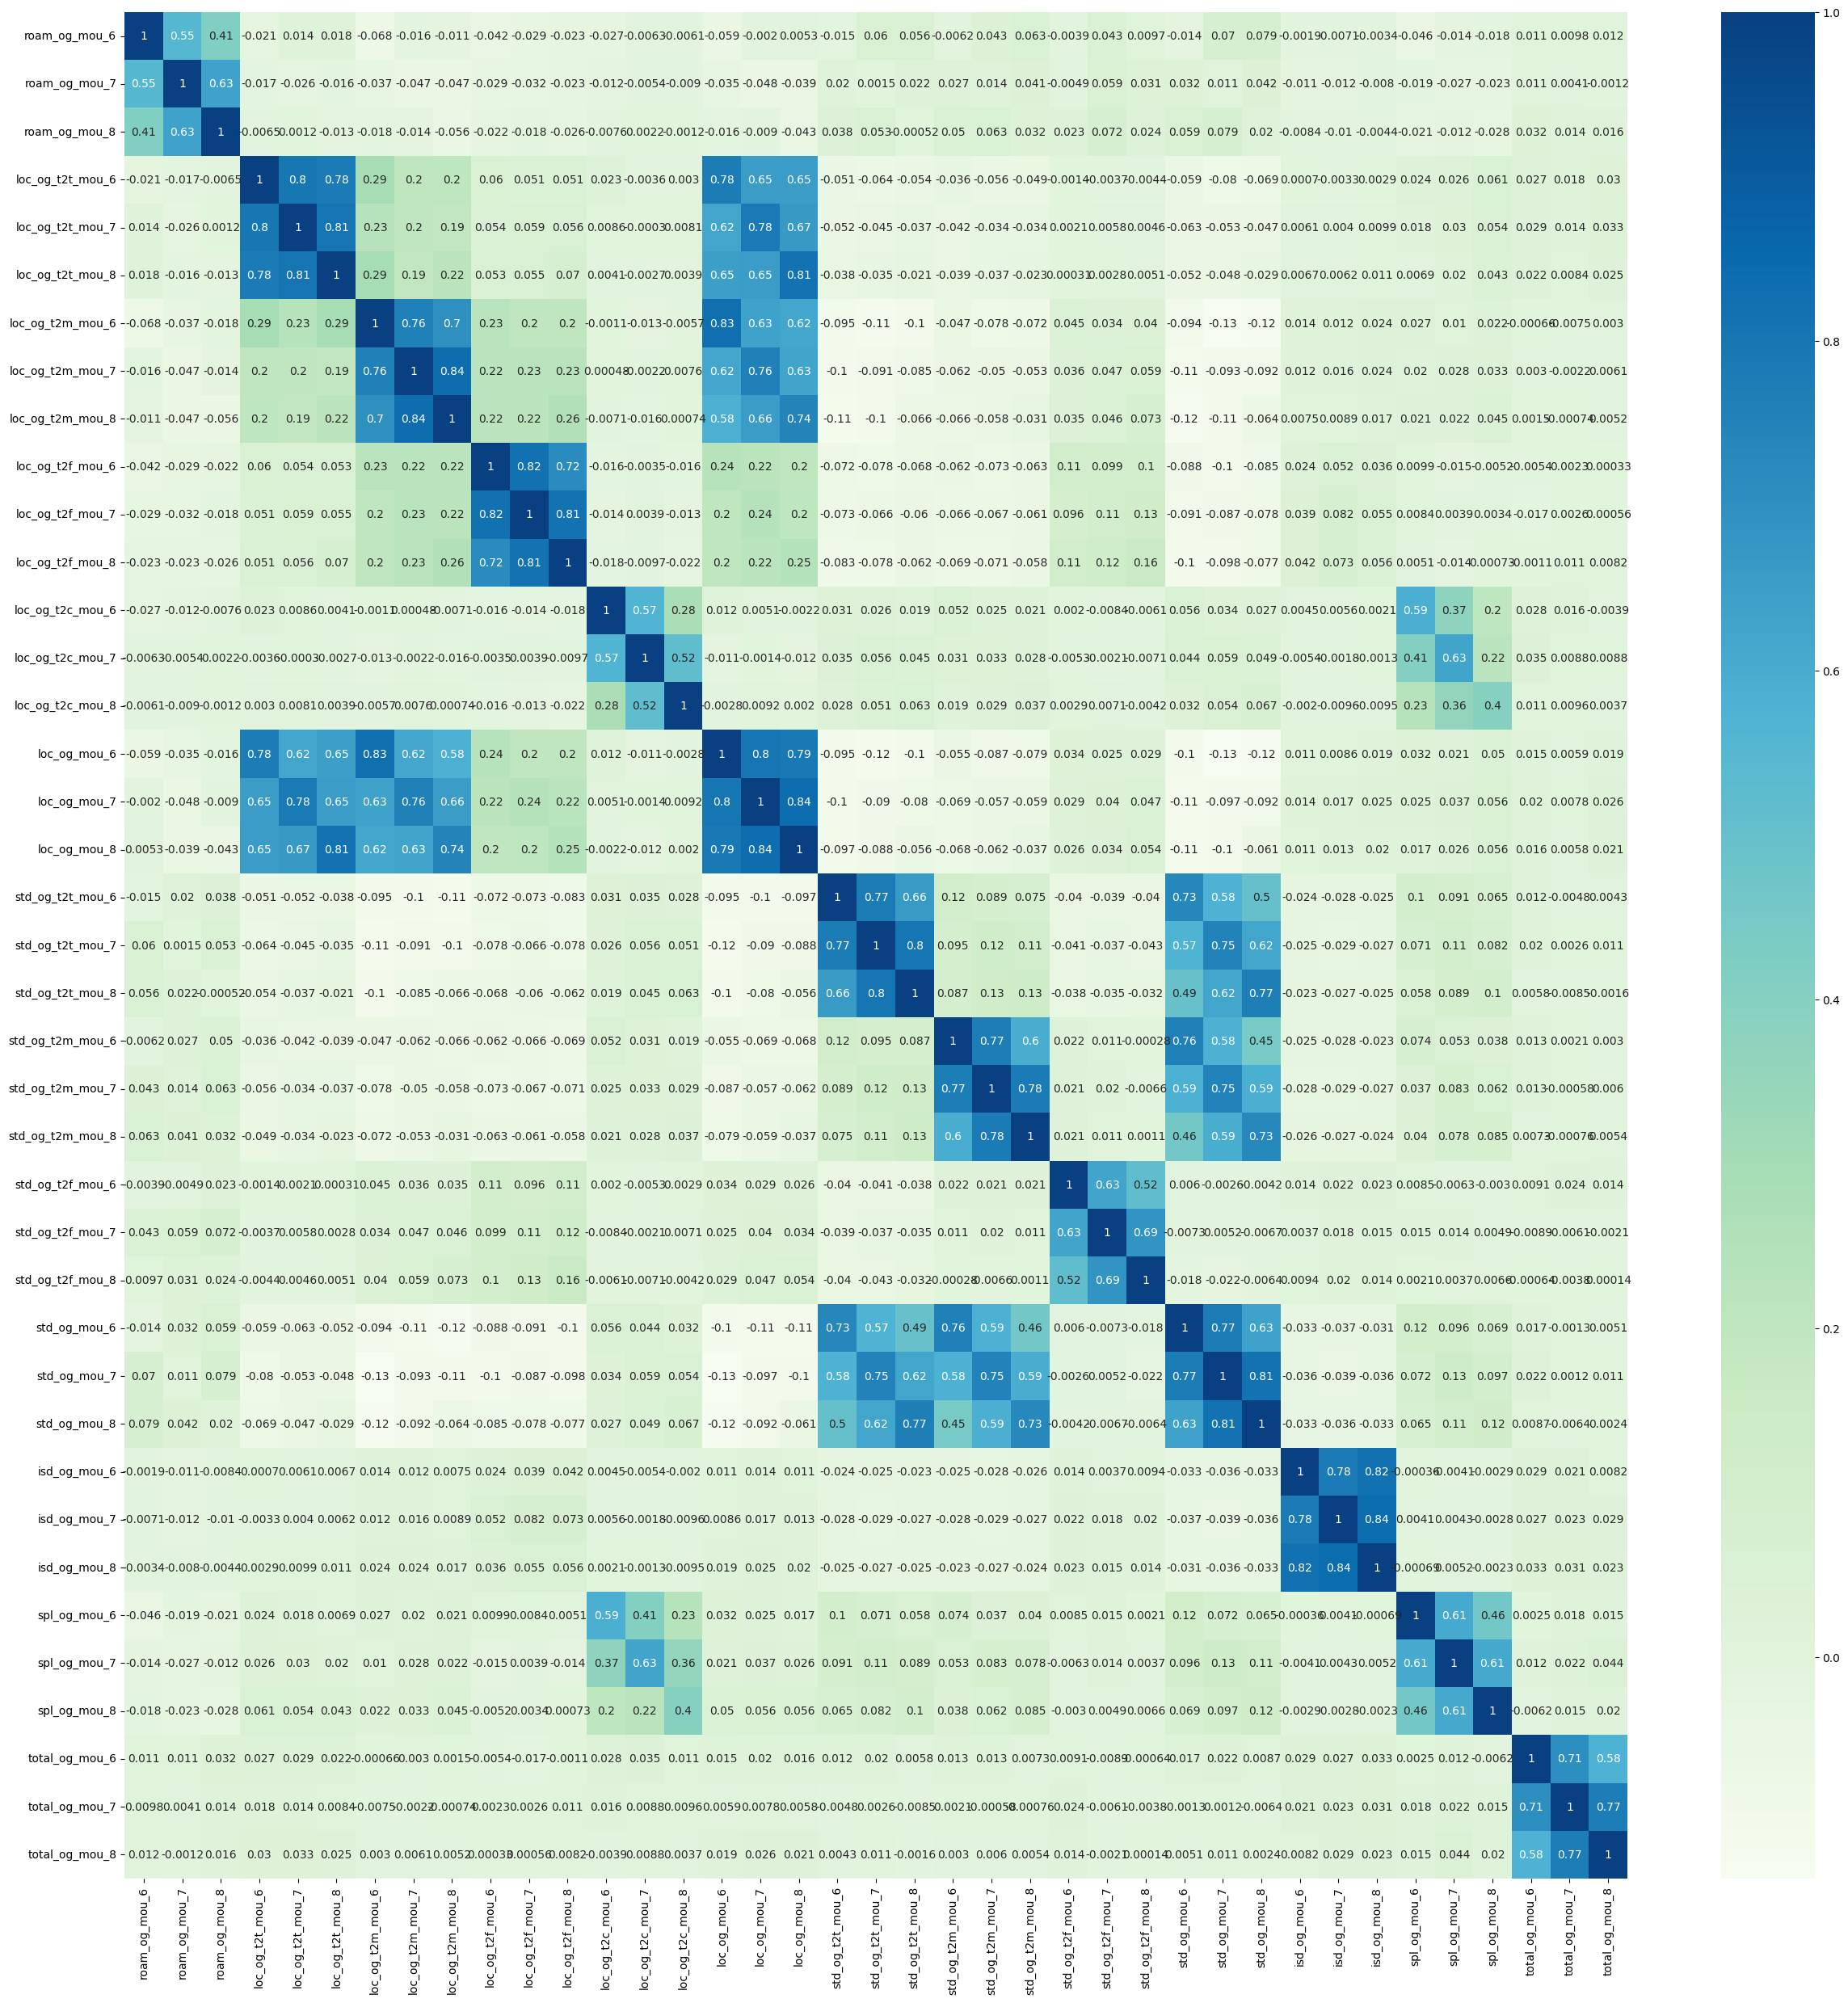

In [133]:
#og_mou_data
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True, cmap='GnBu')
plt.show()

Observations:
•	There exists a very high correlation between the following variables/features:
1.	isd_og_mou_7 and isd_og_mou_6
2.	isd_og_mou_8 and isd_og_mou_6
3.	isd_og_mou_8 and isd_og_mou_7
4.	total_og_mou_6 and std_og_mou_6
5.	total_og_mou_7 and std_og_mou_7
6.	total_og_mou_8 and std_og_mou_8



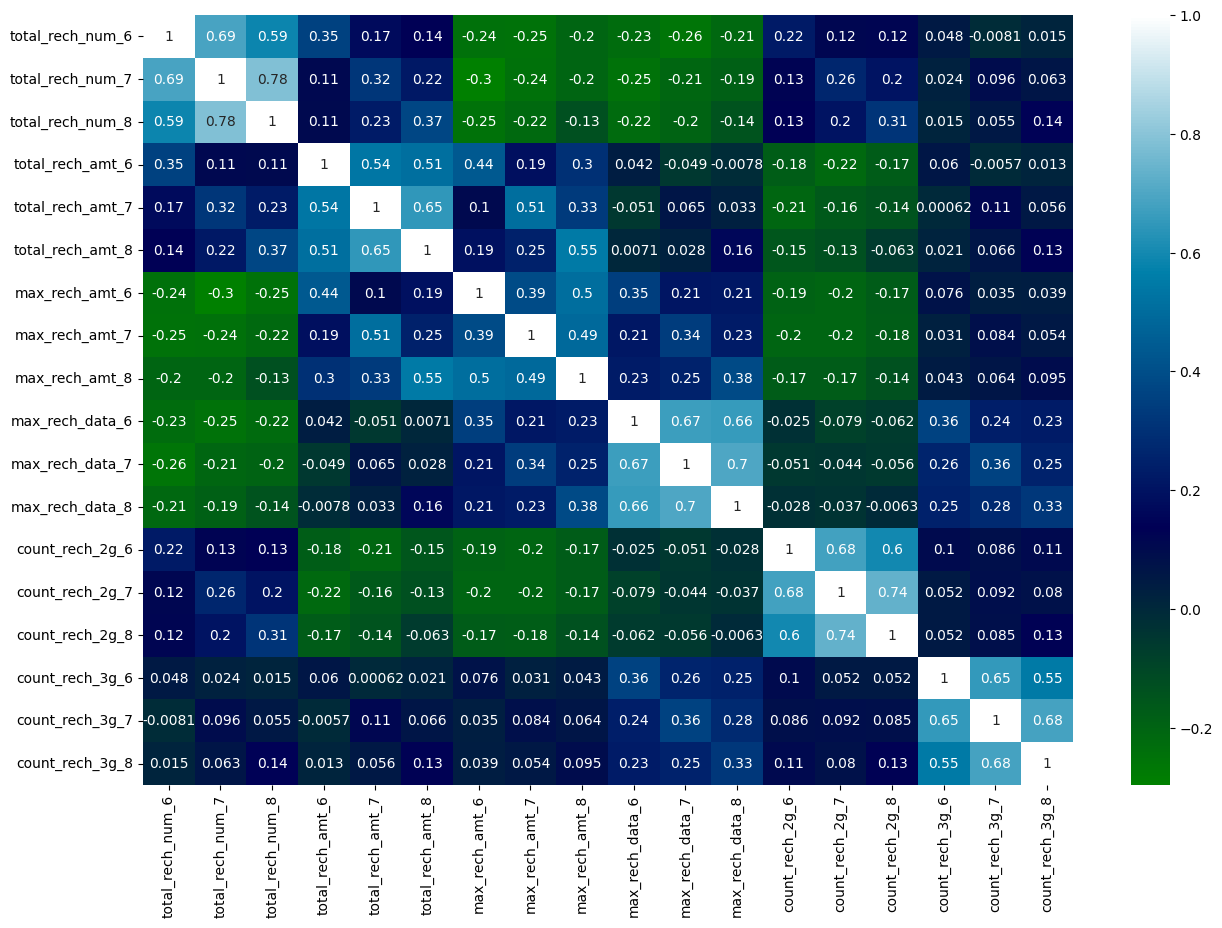

In [134]:
#rech_data
plt.figure(figsize=(15,10))
sns.heatmap(rech_data.corr(), annot=True, cmap='ocean')
plt.show()

Observations:

•	There is a notable correlation between the average recharge amount and the recharge amount for both months 6 and 7.

•	A significant correlation of 76% exists between the total recharge for month 7 and the recharge for month 8.

•	Any factor correlated with month 8 is likely correlated with churn prediction.



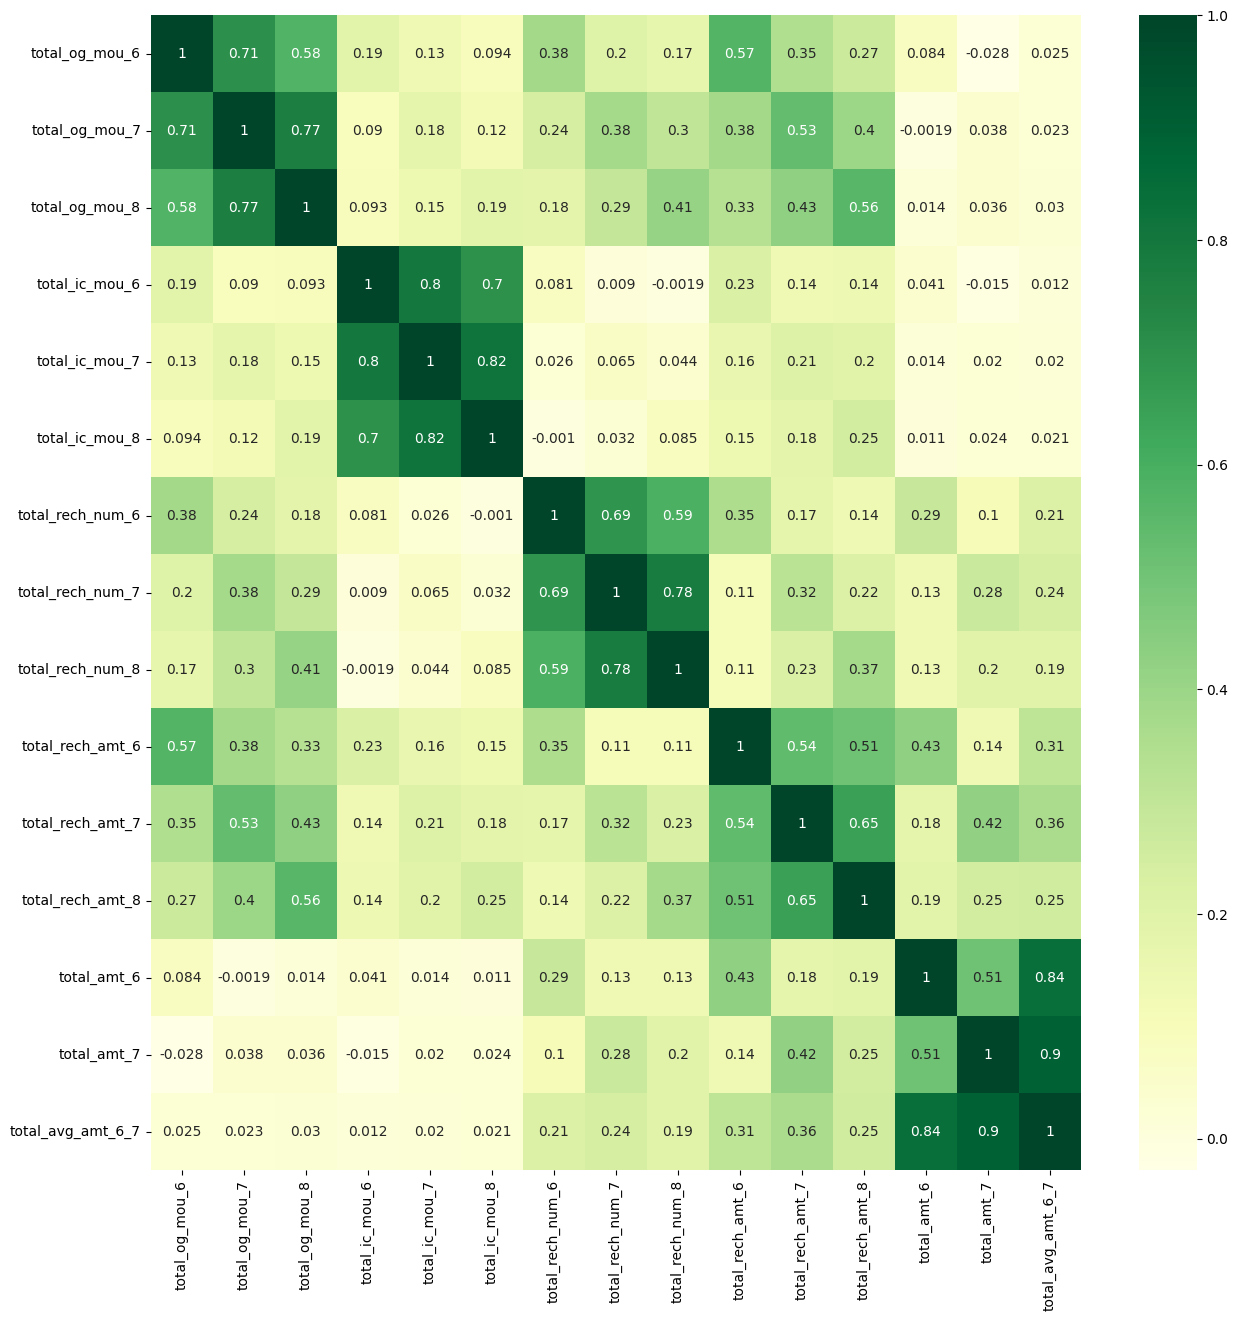

In [135]:
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='YlGn')
plt.show()

Observations:

•	There exists a remarkably high correlation between the incoming (82%) and outgoing minutes (77%) of usage in months 7 and 8.

•	Heavy usage suggests that customers are less likely to churn.



**One Hot Encoding - Training Set**

In [140]:
dummy_df = pd.get_dummies(final_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')

In [141]:
final_df = pd.concat([final_df, dummy_df], axis=1)

In [142]:
final_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [143]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6259 entries, 4 to 20990
Columns: 155 entries, onnet_mou_6 to night_pck_user_6_-1.0
dtypes: category(1), float64(117), int64(37)
memory usage: 7.4 MB


One Hot Encoding - Test Set

In [144]:
dummy_test_df = pd.get_dummies(final_test_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')


In [145]:
final_test_df = pd.concat([final_test_df, dummy_test_df], axis=1)

In [146]:
final_test_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [147]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 155 entries, onnet_mou_6 to night_pck_user_6_1.0
dtypes: float64(117), int64(38)
memory usage: 35.5 MB


**Outlier Treatment**

In [148]:
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

onnet_mou_6  onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  6259.000000  6259.000000   6259.000000   6259.000000   6259.000000   
mean    269.899601   273.578701    246.312478    383.494469    377.976572   
std     467.056052   481.433947    491.603415    497.071154    478.579412   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%      18.350000    17.345000     13.485000     77.785000     76.410000   
50%      89.540000    84.960000     71.740000    230.230000    224.840000   
75%     298.625000   296.600000    245.310000    492.050000    489.010000   
90%     761.160000   802.046000    683.760000    907.466000    926.170000   
95%    1140.145000  1206.633000   1084.616000   1285.512000   1290.850000   
99%    2192.586800  2269.072600   2379.792800   2374.821400   2279.894400   
max    7376.710000  6037.740000  10752.560000   8362.360000   6740.080000   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   6259.000000    6259.000000    6259.000000    6259.000000   
mean     343.029556      15.099054      11.934300      12.421248   
std      457.578967      68.817693      64.868223      64.009425   
min        0.000000       0.000000       0.000000       0.000000   
25%       58.345000       0.000000       0.000000       0.000000   
50%      196.430000       0.000000       0.000000       0.000000   
75%      444.390000       0.000000       0.000000       0.000000   
90%      845.520000      24.664000      13.073232      15.991600   
95%     1186.897000      75.199000      55.402000      54.753200   
99%     2098.038800     326.632600     265.150400     292.353000   
max     6310.390000    1779.810000    1565.090000    1732.880000   

       roam_og_mou_6  ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  \
count    6259.000000  ...    6259.000000    6259.000000    6259.000000   
mean       25.789539  ...       0.057198       0.473398       0.045375   
std       107.927832  ...       0.232238       0.499332       0.208141   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         0.000000  ...       0.000000       0.000000       0.000000   
75%         0.000000  ...       0.000000       1.000000       0.000000   
90%        49.246000  ...       0.000000       1.000000       0.000000   
95%       146.274000  ...       1.000000       1.000000       0.000000   
99%       507.470400  ...       1.000000       1.000000       1.000000   
max      2125.910000  ...       1.000000       1.000000       1.000000   

       fb_user_7_1.0  fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  \
count    6259.000000    6259.000000    6259.000000           6259.000000   
mean        0.525324       0.042339       0.511424              0.557278   
std         0.499398       0.201378       0.499909              0.496748   
min         0.000000       0.000000       0.000000              0.000000   
25%         0.000000       0.000000       0.000000              0.000000   
50%         1.000000       0.000000       1.000000              1.000000   
75%         1.000000       0.000000       1.000000              1.000000   
90%         1.000000       0.000000       1.000000              1.000000   
95%         1.000000       0.000000       1.000000              1.000000   
99%         1.000000       1.000000       1.000000              1.000000   
max         1.000000       1.000000       1.000000              1.000000   

       night_pck_user_7_1.0  night_pck_user_6_1.0  night_pck_user_6_-1.0  
count           6259.000000           6259.000000            6259.000000  
mean               0.013421              0.011823               0.446237  
std                0.115077              0.108097               0.497141  
min                0.000000              0.000000               0.000000  
25%                0.000000              0.000000               0.000000  
50%          

In [149]:
numerical_cols = list(final_df.select_dtypes(exclude='category'))
numerical_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [150]:
# Handle outliers of numerical columns in the training set
final_df[numerical_cols] = final_df[numerical_cols].apply(outlier_handling)

In [151]:
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  6259.000000  6259.000000  6259.000000   6259.000000   6259.000000   
mean      4.208322     4.176207     3.993709      5.086280      5.059605   
std       2.026953     2.053137     2.073041      1.676817      1.696862   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       2.962692     2.909357     2.673114      4.366723      4.349116   
50%       4.505792     4.453882     4.286891      5.443413      5.419827   
75%       5.702532     5.695750     5.506591      6.200611      6.194425   
90%       6.636157     6.688412     6.529068      6.811757      6.832137   
95%       7.039787     7.096418     6.989903      7.159690      7.163831   
99%       7.693292     7.727531     7.775187      7.773098      7.732323   
max       8.906219     8.705951     9.282992      9.031616      8.815975   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   6259.000000    6259.000000    6259.000000    6259.000000   
mean       4.861083       0.689245       0.537225       0.593601   
std        1.810071       1.485055       1.336879       1.373171   
min        0.000000       0.000000       0.000000       0.000000   
25%        4.083368       0.000000       0.000000       0.000000   
50%        5.285384       0.000000       0.000000       0.000000   
75%        6.098950       0.000000       0.000000       0.000000   
90%        6.741134       3.245089       2.644275       2.832718   
95%        7.079940       4.333348       4.032502       4.020916   
99%        7.649233       5.791858       5.584054       5.681377   
max        8.750111       7.484824       7.356337       7.458117   

       roam_og_mou_6  ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  \
count    6259.000000  ...    6259.000000    6259.000000    6259.000000   
mean        0.807326  ...       0.085796       0.710097       0.068062   
std         1.700522  ...       0.348358       0.748998       0.312212   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.000000  ...       0.000000       0.000000       0.000000   
50%         0.000000  ...       0.000000       0.000000       0.000000   
75%         0.000000  ...       0.000000       1.500000       0.000000   
90%         3.916931  ...       0.000000       1.500000       0.000000   
95%         4.992293  ...       1.500000       1.500000       0.000000   
99%         6.231407  ...       1.500000       1.500000       1.500000   
max         7.662426  ...       1.500000       1.500000       1.500000   

       fb_user_7_1.0  fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  \
count    6259.000000    6259.000000    6259.000000           6259.000000   
mean        0.787985       0.063509       0.767135              0.835916   
std         0.749097       0.302066       0.749864              0.745122   
min         0.000000       0.000000       0.000000              0.000000   
25%         0.000000       0.000000       0.000000              0.000000   
50%         1.500000       0.000000       1.500000              1.500000   
75%         1.500000       0.000000       1.500000              1.500000   
90%         1.500000       0.000000       1.500000              1.500000   
95%         1.500000       0.000000       1.500000              1.500000   
99%         1.500000       1.500000       1.500000              1.500000   
max         1.500000       1.500000       1.500000              1.500000   

       night_pck_user_7_1.0  night_pck_user_6_1.0  night_pck_user_6_-1.0  
count           6259.000000           6259.000000            6259.000000  
mean               0.020131              0.017734               0.669356  
std                0.172615              0.162146               0.745711  
min                0.000000              0.000000               0.000000  
25%                0.000000              0.000000               0.000000  
50%                0.0000

In [154]:
final_test_df[numerical_cols] = final_test_df[numerical_cols].apply(outlier_handling)


KeyError: "['night_pck_user_6_-1.0'] not in index"

In [156]:
# Get numerical columns present in both training and test sets
numerical_cols_train = final_df.select_dtypes(exclude='category').columns
numerical_cols_test = final_test_df.select_dtypes(exclude='category').columns
common_numerical_cols = list(set(numerical_cols_train) & set(numerical_cols_test))

# Apply outlier handling to the common numerical columns in the test set
final_test_df[common_numerical_cols] = final_test_df[common_numerical_cols].apply(outlier_handling)

In [158]:
final_test_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  28831.000000  28828.000000  28325.000000  28831.000000  28828.000000   
mean       3.403911      3.365451      3.365128      4.331424      4.296272   
std        1.911553      1.939548      1.941294      1.640221      1.664762   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.113843      2.036012      2.020222      3.566288      3.499835   
50%        3.576830      3.513037      3.528124      4.572957      4.526506   
75%        4.772124      4.755399      4.776852      5.439079      5.420413   
90%        5.835863      5.855782      5.854682      6.146244      6.169780   
95%        6.405096      6.428350      6.433406      6.569376      6.600747   
99%        7.232172      7.299260      7.318504      7.332765      7.357465   
max        8.845829      8.910857      8.813556      8.848432      9.176590   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  28325.000000   28831.000000   28828.000000   28325.000000   
mean       4.288259       0.529502       0.396116       0.406991   
std        1.680773       1.266599       1.098598       1.127439   
min        0.000000       0.000000       0.000000       0.000000   
25%        3.488598       0.000000       0.000000       0.000000   
50%        4.541271       0.000000       0.000000       0.000000   
75%        5.423892       0.000000       0.000000       0.000000   
90%        6.184248       2.516890       1.809927       1.908060   
95%        6.589050       3.704014       3.176490       3.290191   
99%        7.336344       5.397619       5.058777       5.143909   
max        9.514056       9.527002       9.640306       9.480090   

       roam_og_mou_6  ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  \
count   28831.000000  ...    30000.00000   30000.000000    30000.00000   
mean        0.615050  ...        0.04280       0.353300        0.03585   
std         1.417237  ...        0.24974       0.636508        0.22911   
min         0.000000  ...        0.00000       0.000000        0.00000   
25%         0.000000  ...        0.00000       0.000000        0.00000   
50%         0.000000  ...        0.00000       0.000000        0.00000   
75%         0.000000  ...        0.00000       0.000000        0.00000   
90%         3.132446  ...        0.00000       1.500000        0.00000   
95%         4.235699  ...        0.00000       1.500000        0.00000   
99%         5.624150  ...        1.50000       1.500000        1.50000   
max         7.680841  ...        1.50000       1.500000        1.50000   

       fb_user_7_1.0  fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  \
count   30000.000000   30000.000000   30000.000000          30000.000000   
mean        0.349450       0.034150       0.345100              0.377350   
std         0.634092       0.223742       0.631323              0.650881   
min         0.000000       0.000000       0.000000              0.000000   
25%         0.000000       0.000000       0.000000              0.000000   
50%         0.000000       0.000000       0.000000              0.000000   
75%         0.000000       0.000000       0.000000              1.500000   
90%         1.500000       0.000000       1.500000              1.500000   
95%         1.500000       0.000000       1.500000              1.500000   
99%         1.500000       1.500000       1.500000              1.500000   
max         1.500000       1.500000       1.500000              1.500000   

       night_pck_user_7_1.0  night_pck_user_6_0.0  night_pck_user_6_1.0  
count          30000.000000          30000.000000          30000.000000  
mean               0.007950              0.246600              0.009350  
std                0.108914              0.431039              0.118059  
min                0.000000              0.000000              0.000000  
25%                0.000000              0.000000              0.00000

**Model Building and Evaluation**

In [159]:
# Partitioning the dataset into the feature variable 'X' and the response variable 'y'.
X = final_df.drop(['churn_probability'], axis=1)
y = final_df['churn_probability']

In [160]:
X.shape

(6259, 154)

In [161]:
y.shape

(6259,)

In [162]:
X.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
4      2.259678     2.524127     2.615935      4.899033      5.073485   
15     6.316316     5.674319     6.693026      5.051841      4.260706   
23     4.661456     3.843316     4.313614      6.142661      6.648907   
24     2.745988     2.423917     2.164472      6.712178      7.241409   
27     4.591984     4.217447     3.409166      7.550956      5.563025   

    offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
4       5.214011       0.000000       0.000000            0.0       0.000000   
15      5.673804       3.690378       4.900151            0.0       5.060631   
23      6.816331       0.000000       0.000000            0.0       0.000000   
24      7.462651       1.798404       0.000000            0.0       0.000000   
27      5.332767       0.000000       0.000000            0.0       0.000000   

    ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  fb_user_7_1.0  \
4   ...            0.0            1.5            0.0            1.5   
15  ...            0.0            1.5            0.0            0.0   
23  ...            0.0            0.0            0.0            0.0   
24  ...            1.5            0.0            1.5            0.0   
27  ...            0.0            1.5            0.0            1.5   

    fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
4             0.0            1.5                   1.5                   0.0   
15            0.0            1.5                   0.0                   0.0   
23            0.0            0.0                   0.0                   0.0   
24            1.5            0.0                   1.5                   0.0   
27            0.0            1.5                   1.5                   0.0   

    night_pck_user_6_1.0  night_pck_user_6_-1.0  
4                    0.0                    0.0  
15                   0.0                    0.0  
23                   0.0                    1.5  
24                   0.0                    0.0  
27                   0.0                    0.0  

[5 rows x 154 columns]

In [163]:
y.head()

4     0
15    0
23    0
24    0
27    0
Name: churn_probability, dtype: category
Categories (2, int64): [0, 1]

In [164]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [165]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (5007, 154)
y_train Shape: (5007,)
X_val Shape: (1252, 154)
y_val Shape: (1252,)


In [166]:
y_train.value_counts()

churn_probability
0    4589
1     418
Name: count, dtype: int64

In [167]:
smt = SMOTE(random_state=2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [168]:
!pip install imblearn
from imblearn.over_sampling import SMOTE # Import SMOTE from imblearn.over_sampling

smt = SMOTE(random_state=2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [169]:
X_train_smote.shape

(9178, 154)

In [170]:
y_train_smote.shape

(9178,)

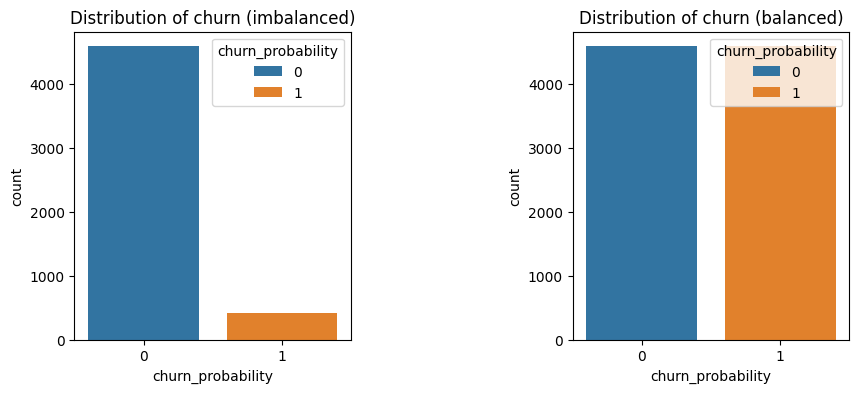

In [171]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(x=y_train, hue=y_train)

plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(x=y_train_smote, hue=y_train_smote)

plt.subplots_adjust(wspace=0.8)
plt.show()

Feature Scaling using SandardScaler - Training Set

In [172]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns = X_train_smote.columns, index = X_train_smote.index)

# Only Transform validation set
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index = X_val.index)

In [173]:
X_train_scaled.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0     0.764998     0.744960     0.581375      0.428425      0.642141   
1    -2.135349    -2.084888    -0.620264     -3.125912     -3.021216   
2     0.357042     0.198537    -0.367045      0.426174      0.267803   
3    -0.076828    -0.082114     0.167214      0.108926      0.072713   
4    -0.369281     0.473914    -0.020706     -0.817399     -0.406937   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      0.244690      -0.483646      -0.416114      -0.462992      -0.497715   
1      0.087967      -0.483646      -0.416114       1.789492      -0.497715   
2      0.132356       2.621431       4.793310       4.413591       1.864748   
3      0.199558      -0.483646      -0.416114      -0.462992      -0.497715   
4     -0.267915      -0.483646      -0.416114      -0.462992      -0.497715   

   ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  fb_user_7_1.0  \
0  ...      -0.248519       1.506186      -0.205972       1.185856   
1  ...      -0.248519       1.506186      -0.205972      -0.876395   
2  ...       4.535122      -0.683619      -0.205972      -0.876395   
3  ...      -0.248519       1.506186      -0.205972       1.185856   
4  ...      -0.248519      -0.683619      -0.205972      -0.876395   

   fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
0      -0.223014       1.145535              1.128594             -0.100367   
1      -0.223014      -0.907091             -0.932457             -0.100367   
2      -0.223014      -0.907091             -0.932457             -0.100367   
3      -0.223014       1.145535              1.128594             -0.100367   
4      -0.223014      -0.907091             -0.932457             -0.100367   

   night_pck_user_6_1.0  night_pck_user_6_-1.0  
0              -0.09749              -1.059193  
1              -0.09749               0.990902  
2              -0.09749               0.990902  
3              -0.09749              -1.059193  
4              -0.09749               0.990902  

[5 rows x 154 columns]

 Feature Scaling using SandardScaler -  Test Set

In [174]:
final_test_df.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0     3.489819     3.055415     3.182627      4.113493      3.501344   
1     4.337421     3.742657     3.036874      6.164030      6.434290   
2     2.144761     2.181547     2.240710      2.889260      3.846097   
3     1.842136     1.150572     0.000000      3.714547      5.327925   
4     6.113527     6.413508     6.553477      4.126166      3.212455   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0      3.578786       0.000000       0.000000       0.000000       0.000000   
1      5.981263       0.000000       0.000000       0.000000       0.000000   
2      3.829511       3.170106       4.648038       3.298795       3.239854   
3      3.219276       0.000000       0.000000       0.000000       0.000000   
4      4.319619       0.000000       0.000000       0.000000       0.000000   

   ...  fb_user_8_0.0  fb_user_8_1.0  fb_user_7_0.0  fb_user_7_1.0  \
0  ...            0.0            0.0            0.0            0.0   
1  ...            0.0            0.0            0.0            0.0   
2  ...            0.0            0.0            0.0            0.0   
3  ...            0.0            0.0            0.0            0.0   
4  ...            0.0            0.0            0.0            0.0   

   fb_user_6_0.0  fb_user_6_1.0  night_pck_user_7_0.0  night_pck_user_7_1.0  \
0            0.0            0.0                   0.0                   0.0   
1            0.0            0.0                   0.0                   0.0   
2            0.0            0.0                   0.0                   0.0   
3            0.0            0.0                   0.0                   0.0   
4            0.0            0.0                   0.0                   0.0   

   night_pck_user_6_0.0  night_pck_user_6_1.0  
0                     0                   0.0  
1                     0                   0.0  
2                     0                   0.0  
3                     0                   0.0  
4                     0                   0.0  

[5 rows x 155 columns]

In [175]:
final_test_df.set_index('id', inplace=True)

Model - Logistic Regression with Recursive Feature Elimination

In [177]:
%%time
from sklearn.feature_selection import RFE
# Select top 20 features using RFE
logreg = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_scaled, y_train_smote)

CPU times: user 2min 9s, sys: 1.78 ms, total: 2min 9s
Wall time: 2min 13s


In [178]:
list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 61),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', False, 14),
 ('offnet_mou_6', False, 63),
 ('offnet_mou_7', False, 82),
 ('offnet_mou_8', False, 12),
 ('roam_ic_mou_6', False, 43),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 34),
 ('roam_og_mou_6', False, 42),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 33),
 ('loc_og_t2t_mou_6', False, 17),
 ('loc_og_t2t_mou_7', False, 47),
 ('loc_og_t2t_mou_8', False, 78),
 ('loc_og_t2m_mou_6', False, 120),
 ('loc_og_t2m_mou_7', False, 13),
 ('loc_og_t2m_mou_8', False, 19),
 ('loc_og_t2f_mou_6', False, 49),
 ('loc_og_t2f_mou_7', False, 59),
 ('loc_og_t2f_mou_8', False, 86),
 ('loc_og_t2c_mou_6', False, 118),
 ('loc_og_t2c_mou_7', False, 117),
 ('loc_og_t2c_mou_8', False, 102),
 ('loc_og_mou_6', False, 72),
 ('loc_og_mou_7', False, 46),
 ('loc_og_mou_8', False, 18),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', False, 35),
 ('std_og_t2m_mou_6', False, 41),
 ('std_

In [179]:
# Selected features using RFE
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_mou_7', 'arpu_7',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'count_rech_3g_7',
       'vol_2g_mb_8', 'arpu_3g_8', 'monthly_3g_7', 'total_amt_7'],
      dtype='object')

In [180]:
X_train_scaled_final = X_train_scaled[selected_features]
logreg.fit(X_train_scaled_final, y_train_smote)

LogisticRegression(max_iter=1000, solver='sag', tol=0.001)

In [181]:
y_train_smote_pred = logreg.predict(X_train_scaled_final)

In [182]:
# Calculate metrics on the training set
calculate_classification_metrics(y_train_smote, y_train_smote_pred)

Confusion Matrix

[[4013  576]
 [ 730 3859]]


Metric   Value
0             Accuracy  0.8577
1          Sensitivity  0.8409
2          Specificity  0.8745
3            Precision  0.8701
4  False Positive Rate  0.1255
5   True Positive Rate  0.8409

In [183]:
# Retain only the selected feature from the final model
X_val_scaled_final = X_val_scaled[selected_features]
X_val_scaled_final.head()

roam_ic_mou_7  roam_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
3918       -0.416114      -0.435721          0.384913          0.849009   
18888      -0.416114      -0.435721         -0.705649         -0.370660   
13591       0.447242       1.306052         -0.967249         -0.945849   
17427      -0.416114      -0.435721         -0.314721          0.469349   
18601      -0.416114      -0.435721          2.015861         -0.199915   

       std_ic_t2m_mou_7  std_ic_mou_7    arpu_7  total_ic_mou_8  \
3918           1.597430      1.601056  0.151395       -0.473364   
18888          1.285890      1.033827 -0.611289        0.064136   
13591          0.009779     -0.273491  0.488575        0.616610   
17427          0.744185      0.607348  0.963016        1.504311   
18601         -1.168592     -1.216162 -1.368475       -1.278892   

       total_rech_num_7  total_rech_num_8  total_rech_amt_6  total_rech_amt_7  \
3918           1.349150          2.021698          0.154103          0.178055   
18888          0.092257          0.549483         -0.805516         -0.418753   
13591          1.280584          1.575448          0.082143          0.458736   
17427          0.480787          1.161066         -4.990394          0.869013   
18601         -0.635924         -0.352462         -0.990735         -1.133425   

       max_rech_amt_6  max_rech_amt_8  last_day_rch_amt_8  count_rech_3g_7  \
3918        -1.027569        0.170847            0.754342        -0.510026   
18888       -1.366081       -0.147892            0.446667        -0.510026   
13591       -0.719677        0.617152            1.185156        -0.510026   
17427       -4.492037        0.684371            1.185156        -0.510026   
18601       -1.718892       -0.321861            0.053834        -0.510026   

       vol_2g_mb_8  arpu_3g_8  monthly_3g_7  total_amt_7  
3918     -0.569192  -0.460855     -0.383739    -0.094024  
18888     2.558277   1.190189     -0.383739     0.960021  
13591    -0.569192  -0.460855     -0.383739     0.176866  
17427    -0.569192  -0.460855     -0.383739     0.572833  
18601    -0.527900  -0.460855     -0.383739    -0.615557

In [184]:
# Get the predicted values from the linear model
y_val_pred = logreg.predict(X_val_scaled_final)

In [185]:
confusion = confusion_matrix(y_true=y_val, y_pred=y_val_pred)
print(confusion)

[[1021  111]
 [  20  100]]


In [186]:
# Calculate metrics
metrics_df = calculate_classification_metrics(y_true=y_val, y_pred=y_val_pred)
metrics_df

Confusion Matrix

[[1021  111]
 [  20  100]]


Metric   Value
0             Accuracy  0.8954
1          Sensitivity  0.8333
2          Specificity  0.9019
3            Precision  0.4739
4  False Positive Rate  0.0981
5   True Positive Rate  0.8333

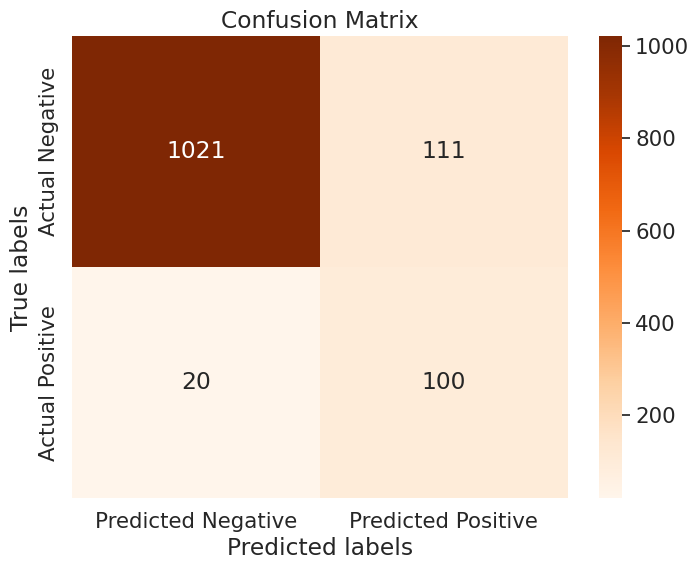

In [187]:
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
cm_array = np.array(confusion).reshape(2,2)

# Create the heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, cmap='Oranges', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [190]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [191]:
# ROC AUC Score
"{:2.2f}".format(roc_auc_score(y_val, y_val_pred))

'0.87'

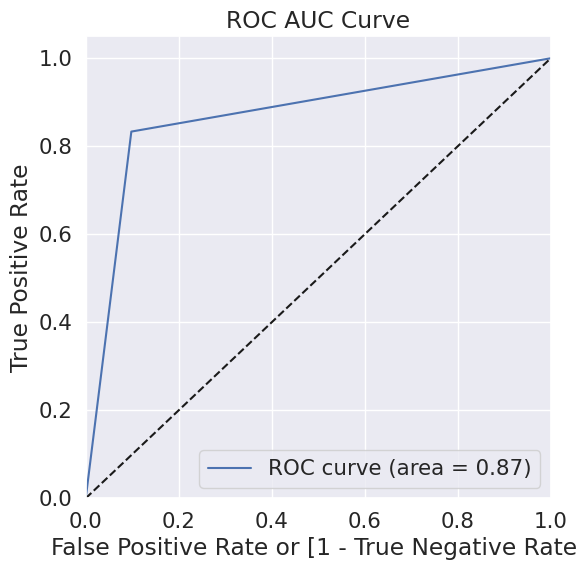

In [192]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model - Logistic Regression with PCA and Hyperparameter Tuning

In [194]:
# Import PCA from sklearn.decomposition
from sklearn.decomposition import PCA

# Now you can create an instance of PCA
pca = PCA()

In [195]:
pca_components = pca.fit_transform(X_train)
pca_components

array([[ 1.17085528e+01, -1.05486145e+00,  1.10058309e+01, ...,
         1.99840144e-15, -1.16295862e-14,  2.73392420e-15],
       [ 4.63249293e-01, -1.29002859e+01, -4.49438224e+00, ...,
        -1.16573418e-14,  4.30211422e-15,  5.99520433e-15],
       [-5.68887601e+00, -8.68444609e+00, -7.37803394e+00, ...,
        -3.33066907e-15,  9.35362898e-15,  6.32827124e-15],
       ...,
       [ 1.24601822e+01,  6.17740257e+00, -7.58051454e+00, ...,
         1.77635684e-15,  8.90953977e-15, -7.48012763e-15],
       [ 2.55524594e+00, -7.80410502e+00, -3.29213372e+00, ...,
         8.43769499e-15,  2.24820162e-15, -5.81479309e-15],
       [ 2.19549512e+01, -8.84476771e+00, -6.08795753e+00, ...,
         1.99840144e-15,  9.29811783e-15,  3.95516953e-15]])

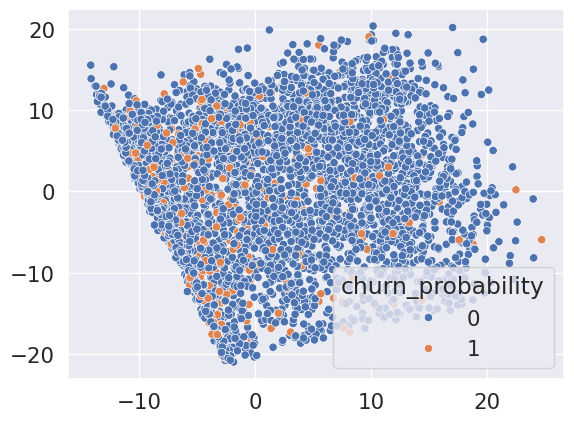

In [196]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

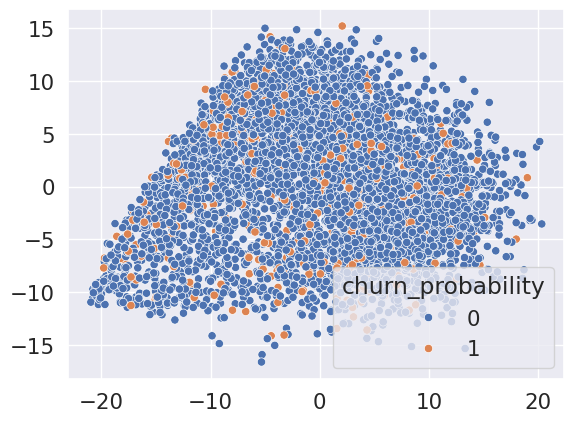

In [197]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [198]:
X = high_val_train.copy().drop(['churn_probability'], axis=1)
y = high_val_train.copy()['churn_probability']

In [199]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [217]:
!pip install imblearn
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn.pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the pipeline with SMOTE
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('smote', SMOTE(random_state=2)), # Include SMOTE in the pipeline
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('logisticregression', LogisticRegression(max_iter=1000, tol=0.001, random_state=42)),
])

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
}

# Instantiate GridSearchCV
lr_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
lr_best_params = lr_grid_search.best_params_
lr_best_estimator = lr_grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [218]:
y_train_pred = lr_grid_search.predict(X_train)

In [219]:
y_val_pred = lr_grid_search.predict(X_val)

In [220]:
# Metrics of the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[12478  2922]
 [  277  1121]]


Metric   Value
0             Accuracy  0.8096
1          Sensitivity  0.8019
2          Specificity  0.8103
3            Precision  0.2773
4  False Positive Rate  0.1897
5   True Positive Rate  0.8019

In [221]:
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3141  722]
 [  77  260]]


Metric   Value
0             Accuracy  0.8098
1          Sensitivity  0.7715
2          Specificity  0.8131
3            Precision  0.2648
4  False Positive Rate  0.1869
5   True Positive Rate  0.7715

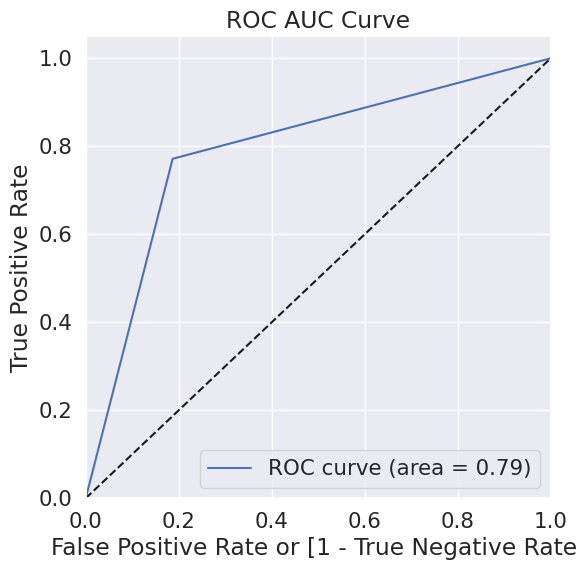

In [222]:
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

In [229]:
!pip install imblearn
from imblearn.pipeline import Pipeline # Import Pipeline from imblearn.pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming 'dt' is your DecisionTreeClassifier instance
dt = DecisionTreeClassifier(random_state=42)

# Create the pipeline using imblearn.pipeline.Pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('smote', SMOTE(random_state=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=25)),
    ('decisiontreeclassifier', dt)  # Use 'decisiontreeclassifier' as the name for the estimator
])

# Define the parameter grid
params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=pipe,
                           param_grid=params,
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE(random_state=2)),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10, 20,
                                                                      50,
                                                                      100]},
             scoring='accuracy', verbose=1)

In [231]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on train set using the best model
y_train_pred = grid_search.predict(X_train)

# Predict on validation set using the best model
y_val_pred = grid_search.predict(X_val)

In [232]:
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[14670   730]
 [   72  1326]]


Metric   Value
0             Accuracy  0.9523
1          Sensitivity  0.9485
2          Specificity  0.9526
3            Precision  0.6449
4  False Positive Rate  0.0474
5   True Positive Rate  0.9485

In [233]:
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3297  566]
 [ 154  183]]


Metric   Value
0             Accuracy  0.8286
1          Sensitivity  0.5430
2          Specificity  0.8535
3            Precision  0.2443
4  False Positive Rate  0.1465
5   True Positive Rate  0.5430

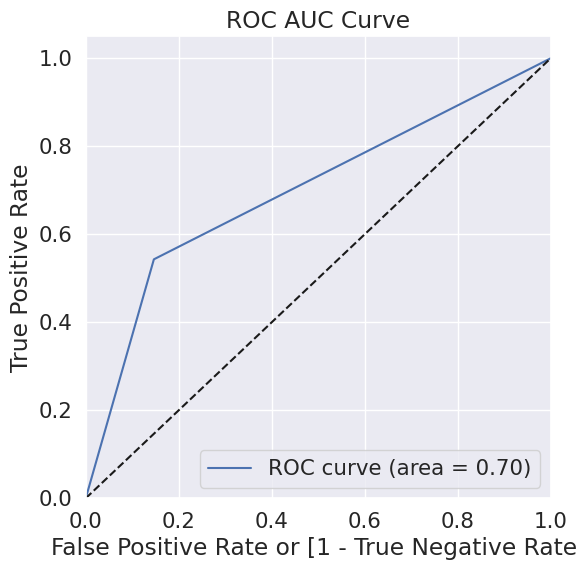

In [234]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Model - AdaBoost Classifier

In [236]:
# Import AdaBoostClassifier from sklearn.ensemble
from sklearn.ensemble import AdaBoostClassifier

# Create a pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('smote', SMOTE(random_state=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=25)),
    ('adaboost', AdaBoostClassifier(n_estimators=200, random_state=42))  # Use 'adaboost' as the name
])

In [237]:
adaboost_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



In [238]:
# Predict on train set using the best model
y_train_pred = adaboost_model.predict(X_train)

# Predict on train set using the validation model
y_test_pred = adaboost_model.predict(X_val)

In [239]:
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[12959  2441]
 [  285  1113]]


Metric   Value
0             Accuracy  0.8377
1          Sensitivity  0.7961
2          Specificity  0.8415
3            Precision  0.3132
4  False Positive Rate  0.1585
5   True Positive Rate  0.7961

In [240]:
calculate_classification_metrics(y_val, y_val_pred)

Confusion Matrix

[[3297  566]
 [ 154  183]]


Metric   Value
0             Accuracy  0.8286
1          Sensitivity  0.5430
2          Specificity  0.8535
3            Precision  0.2443
4  False Positive Rate  0.1465
5   True Positive Rate  0.5430

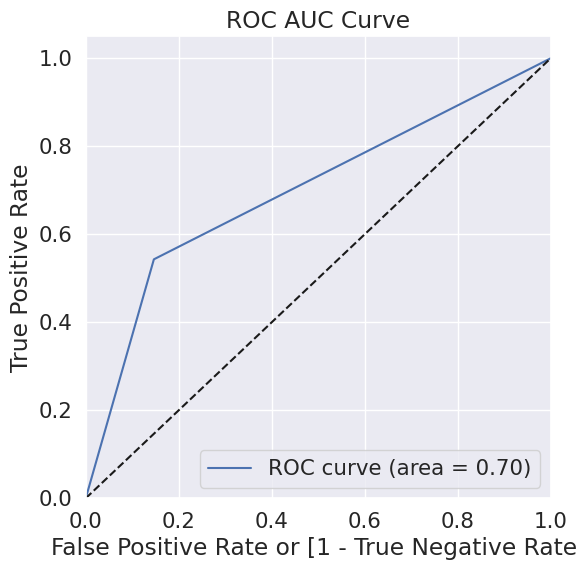

In [241]:
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

Create submission.csv file for final submission on Kaggle

In [249]:
submission_data = final_test_df[selected_features]
submission_data.shape

(30000, 20)

In [251]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN with 0
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit the imputer on your training data (or the relevant columns of your training data)
imputer.fit(X_train_scaled_final) # Use X_train_scaled_final if you only want to impute the selected features

# Transform the submission_data to replace NaN values
submission_data_imputed = imputer.transform(submission_data)

# Convert the imputed data back into a DataFrame if needed
submission_data_imputed = pd.DataFrame(submission_data_imputed, columns=submission_data.columns, index=submission_data.index)

# Now, make predictions using the imputed data
final_test_df['churn_probability'] = logreg.predict(submission_data_imputed)
output = final_test_df[['churn_probability']]
output.head()

<ipython-input-251-3a4ce26857d8>:16: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



churn_probability
id                      
69999                  0
70000                  0
70001                  1
70002                  0
70003                  0

In [253]:
output.to_csv('submission.csv',index=True)